### CARGA DE LIBRERÍAS

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import itertools
import pyreadstat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, accuracy_score
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from scipy.stats import chisquare
from unidecode import unidecode
from sklearn.linear_model import Ridge

### CARGA DE DATOS

In [3]:
pd.set_option('display.max_columns', 500)
datos_fragilidad = "C:/Users/Carmen/Desktop/CUARTO CARRERA/TFG/FRAGILIDAD/Datos_fragilidad_18_19_20_oleada2e3unida_V+G+P_fundida_11_01_23_RECODIFICADA_DCS_27_03_2023.sav"
datos, metadatos = pyreadstat.read_sav(datos_fragilidad, apply_value_formats=True, encoding='utf-8')
df = pd.DataFrame(datos)
pd.set_option('display.notebook_repr_html', True)

df

@1Código     Lugar @2Fechaevaluación  Edad Edad_grupos   @3Sexo  \
0      1101.0  Valencia        2019-03-08  72.0       70-79  Hombres   
1      1109.0  Valencia        2019-03-15  69.0       60-69  Mujeres   
2      1102.0  Valencia        2019-03-08  68.0       60-69  Mujeres   
3      1103.0  Valencia        2019-03-08  69.0       60-69  Mujeres   
4      1104.0  Valencia        2019-03-08  73.0       70-79  Mujeres   
..        ...       ...               ...   ...         ...      ...   
609    3246.0  Portugal        2020-01-28  60.0       60-69  Mujeres   
610    3247.0  Portugal        2020-01-28  64.0       60-69  Hombres   
611    3248.0  Portugal        2020-01-29  69.0       60-69  Mujeres   
612    3249.0  Portugal        2020-01-29  67.0       60-69  Mujeres   
613    3250.0  Portugal        2020-01-30  61.0       60-69  Mujeres   

    @4Fechanacimiento  @6Lenguas  @7Estudios  @8Añosdeeducación @8.1Cursos  \
0          2046-10-04        2.0         3.0               15.0         no   
1          2050-03-23        1.0         2.0               10.0         no   
2          2051-06-21        2.0         2.0                7.0         no   
3          2050-01-31        2.0         2.0                9.0         si   
4          2045-08-01        2.0         2.0               11.0         no   
..                ...        ...         ...                ...        ...   
609        1959-08-03        3.0         NaN                6.0         no   
610        1956-01-12        1.0         NaN                4.0         no   
611        1950-07-27        2.0         NaN                8.0         no   
612        1952-11-09        1.0         NaN                4.0         no   
613        1958-05-13        1.0         NaN                7.0         no   

     @8.2Cursosmeses  @9Actividadesartísticas  @10Actividadessocioculturales  \
0                NaN                      1.0                            3.0   
1                NaN                      3.0                            1.0   
2                NaN                      1.0                            4.0   
3               11.0                      1.0                            2.0   
4                NaN                      1.0                            4.0   
..               ...                      ...                            ...   
609              NaN                      0.0                            0.0   
610              NaN                      0.0                            0.0   
611              NaN                      0.0                            2.0   
612              NaN                      0.0                            0.0   
613              NaN                      1.0                            0.0   

     @11Salidas  Estilo_de_vida @12Profesión  \
0           3.0             7.0     Jubilado   
1           1.0             5.0     Jubilado   
2           2.0             7.0     Jubilado   
3           1.0             4.0     Jubilado   
4           2.0             7.0     Jubilado   
..          ...             ...          ...   
609         0.0             NaN          NaN   
610         0.0             NaN          NaN   
611         0.0             NaN          NaN   
612         0.0             NaN          NaN   
613         0.0             NaN          NaN   

                     @12aCategoríaprofesional @13EstadoCivil        @14Vive  \
0     Altos funcionarios o de dirección, etc.         Casado        Cónyuge   
1    Trabajador cualificado, comerciante, etc         Casado        Cónyuge   
2    Trabajador cualificado, comerciante, etc        Soltero          Hijos   
3                   Obrero/a no cualificado/a         Casado        Cónyuge   
4                   Obrero/a no cualificado/a         Casado        Cónyuge   
..                                        ...            ...            ...   
609                 Obrero/a no cualificado/a            NaN  Cónyuge+hijos   
610                 Obrero/a no c

### LIMPIEZA Y PROCESADO DE DATOS

##### CALCULAMOS DEL PORCENTAJE DE DATOS FALTANTES DE CADA COLUMNA (nos quedamos con las que tienen menos de un 17%)

In [4]:
pd.set_option('display.max_columns', None)
total_nulos = df.isnull().sum()
total_filas = df.shape[0]
porcNAs = (total_nulos / total_filas) * 100

df_nulos = pd.DataFrame({'Porcentaje NAs': porcNAs})
columnas_finales = df_nulos[df_nulos['Porcentaje NAs'] < 17]

columnas_finales.shape[0] # finalmente nos quedamos con 117 columnas

117

In [5]:
# Seleccionamos las columnas con menos de un 17% de NAs

df = df[['@1Código', 'Lugar', '@2Fechaevaluación', 'Edad', 'Edad_grupos' , '@3Sexo', '@4Fechanacimiento', '@6Lenguas', '@8Añosdeeducación', '@8.1Cursos', '@9Actividadesartísticas', '@10Actividadessocioculturales', '@11Salidas', '@12aCategoríaprofesional', '@14Vive', '@15Total_Sin_CorreciónAVD', '@16Total_Correción_TradicionalAVD', '@17Total_Correción_NuevaAVD', '@18Timeupampgo', '@19Fuerzaprensil1', '@20Fuerzaprensil2', '@21Fuerzaprensil3', '@22FUERZAPRENSILMEDIA', '@23MoCA', '@24Fluidez', '@25Tracking', '@26Dualfluidez', '@27Dualtracking', 'CostRespFluid', 'CostRespVeloc', '@30PérdidadepesoA', '@31PérdidadepesoB', '@32Enfermedadesdestacables', '@33Fármacosotratamientosmédicos', '@34índicedecomorbilidad', '@35Hospitalizaciones', '@36Caídas', '@37Antecedentesmemoria', '@38Vista', '@40Oido', '@42Movilidadmanos', '@43TotalresultadoVREM', 'Clasif_VREM_Recodificado', '@45Aspectospsicosociales1', '@46Aspectospsicosociales2', '@47Aspectospsicosociales3', '@48Aspectospsicosociales4', '@49Aspectospsicosociales5', '@50Aspectospsicosociales6', '@51Aspectospsicosociales7', '@52Aspectospsicosociales8', '@53Aspectospsicosociales9', '@54Aspectospsicosociales10', '@55Aspectospsicosociales11', '@56Aspectospsicosociales12', '@57Aspectospsicosociales13', '@58Aspectospsicosociales14', '@59Aspectospsicosociales15', '@60Aspectospsicosociales16', '@61Aspectospsicosociales17', '@62Aspectospsicosociales18', '@63Aspectospsicosociales19', '@64Aspectospsicosociales20', '@65Apoyoemocional', '@65Apoyoemocional', '@67Interacciónsocial', '@68Apoyoafectivo', 'Apoyo_social_TOTAL', 'MOS_clasificacion_TOTAL', 'MFE1', 'MFE2', 'MFE3', 'MFE4', 'MFE5', 'MFE6', 'MFE7', 'MFE8', 'MFE9', 'MFE10', 'MFE11', 'MFE12', 'MFE13', 'MFE14', 'MFE15', 'MFE16', 'MFE17', 'MFE18', 'MFEtotal18', 'TOTAL_MFE_11_ITEMS', '@89GHQ121', '@90GHQ122', '@91GHQ123', '@92GHQ124', '@93GHQ125', '@94GHQ126', '@95GHQ127', '@96GHQ128', '@97GHQ129', '@98GHQ1210', '@99GHQ1211', '@100GHQ1212', '@101AFRONTDISFSOC', '@102AE', '@103ANSIEDADESTRÉS', 'GHQ_TOTAL', 'Criterio1', 'Criterio2', 'Criterio3', 'Criterio4', 'Criterio5', 'Diagnostico_Fragilidad_Fisica', 'Diagnostico_Fragilidad_Cognitiva', 'Deterioro_Cognitivo_Normal_DCL_DCS', 'Diagnóstico_Frag_Fisica_Cognitiva_DCL_DCS', 'Valencia_normal_dcs', 'Santiago_normal_dcs', 'Diagnostico_Frag_Fisica_Cognitiva_DCL_DCS_recodif']]
df.columns = ['Código', 'Lugar', 'FechaEvaluación', 'Edad', 'EdadGrupos' , 'Sexo', 'FechaNacimiento', 'Lenguas', 'Añosdeeducación', 'Cursos', 'ActividadesArtísticas', 'ActividadesSocioculturales', 'Salidas', 'CategoríaProfesional', 'Vive', 'TotalSinCorreciónAVD', 'TotalCorrecciónTradicionalAVD', 'TotalCorrecciónNuevaAVD', 'Timeupampgo', 'FuerzaPrensil1', 'FuerzaPrensil2', 'FuerzaPrensil3', 'FuerzaPrensilMedia', 'MoCA', 'Fluidez', 'Tracking', 'DualFluidez', 'DualTracking', 'CostRespFluid', 'CostRespVeloc', 'PérdidaPesoA', 'PérdidaPesoB', 'EnfermedadesDestacables', 'FármacosoTratamientosMédicos', 'ÍndiceComorbilidad', 'Hospitalizaciones', 'Caídas', 'AntecedentesMemoria', 'Vista', 'Oído', 'MovilidadManos', 'TotalResultadoVREM', 'ClasificaciónVREMRecodificado', 'AspectosPsicosociales1', 'AspectosPsicosociales2', 'AspectosPsicosociales3', 'AspectosPsicosociales4', 'AspectosPsicosociales5', 'AspectosPsicosociales6', 'AspectosPsicosociales7', 'AspectosPsicosociales8', 'AspectosPsicosociales9', 'AspectosPsicosociales10', 'AspectosPsicosociales11', 'AspectosPsicosociales12', 'AspectosPsicosociales13', 'AspectosPsicosociales14', 'AspectosPsicosociales15', 'AspectosPsicosociales16', 'AspectosPsicosociales17', 'AspectosPsicosociales18', 'AspectosPsicosociales19', 'AspectosPsicosociales20', 'AoyoEmocional', 'ApoyoInstrumental', 'InteracciónSocial', 'ApoyoAfectivo', 'ApoyoSocialTotal', 'MOSClasificacionTotal', 'MFE1', 'MFE2', 'MFE3', 'MFE4', 'MFE5', 'MFE6', 'MFE7', 'MFE8', 'MFE9', 'MFE10', 'MFE11', 'MFE12', 'MFE13', 'MFE14', 'MFE15', 'MFE16', 'MFE17', 'MFE18', 'MFETotal18', 'TotalMFE11Items', 'GHQ121', 'GHQ122', 'GHQ123', 'GHQ124', 'GHQ125', 'GHQ126', 'GHQ127', 'GHQ128', 'GHQ129', 'GHQ1210', 'GHQ1211', 'GHQ1212', 'AFRONTDISFSOC', 'AE', 'AnsidadEstrés', 'GHQ_Total', 'Criterio1', 'Criterio2', 'Criterio3', 'Criterio4', 'Criterio5', 'DiagnósticoFragilidadFísica', 'DiagnósticoFragilidadCognitiva', 'DeterioroCognitivoNormal_DCL_DCS', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS', 'ValenciaNormalDCS', 'SantiagoNormalDCS', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS_Recodificado']

df

Código     Lugar FechaEvaluación  Edad EdadGrupos     Sexo  \
0    1101.0  Valencia      2019-03-08  72.0      70-79  Hombres   
1    1109.0  Valencia      2019-03-15  69.0      60-69  Mujeres   
2    1102.0  Valencia      2019-03-08  68.0      60-69  Mujeres   
3    1103.0  Valencia      2019-03-08  69.0      60-69  Mujeres   
4    1104.0  Valencia      2019-03-08  73.0      70-79  Mujeres   
..      ...       ...             ...   ...        ...      ...   
609  3246.0  Portugal      2020-01-28  60.0      60-69  Mujeres   
610  3247.0  Portugal      2020-01-28  64.0      60-69  Hombres   
611  3248.0  Portugal      2020-01-29  69.0      60-69  Mujeres   
612  3249.0  Portugal      2020-01-29  67.0      60-69  Mujeres   
613  3250.0  Portugal      2020-01-30  61.0      60-69  Mujeres   

    FechaNacimiento  Lenguas  Añosdeeducación Cursos  ActividadesArtísticas  \
0        2046-10-04      2.0             15.0     no                    1.0   
1        2050-03-23      1.0             10.0     no                    3.0   
2        2051-06-21      2.0              7.0     no                    1.0   
3        2050-01-31      2.0              9.0     si                    1.0   
4        2045-08-01      2.0             11.0     no                    1.0   
..              ...      ...              ...    ...                    ...   
609      1959-08-03      3.0              6.0     no                    0.0   
610      1956-01-12      1.0              4.0     no                    0.0   
611      1950-07-27      2.0              8.0     no                    0.0   
612      1952-11-09      1.0              4.0     no                    0.0   
613      1958-05-13      1.0              7.0     no                    1.0   

     ActividadesSocioculturales  Salidas  \
0                           3.0      3.0   
1                           1.0      1.0   
2                           4.0      2.0   
3                           2.0      1.0   
4                           4.0      2.0   
..                          ...      ...   
609                         0.0      0.0   
610                         0.0      0.0   
611                         2.0      0.0   
612                         0.0      0.0   
613                         0.0      0.0   

                         CategoríaProfesional           Vive  \
0     Altos funcionarios o de dirección, etc.        Cónyuge   
1    Trabajador cualificado, comerciante, etc        Cónyuge   
2    Trabajador cualificado, comerciante, etc          Hijos   
3                   Obrero/a no cualificado/a        Cónyuge   
4                   Obrero/a no cualificado/a        Cónyuge   
..                                        ...            ...   
609                 Obrero/a no cualificado/a  Cónyuge+hijos   
610                 Obrero/a no cualificado/a        Cónyuge   
611                             Sin ocupación          Hijos   
612                             Sin ocupación        Cónyuge   
613                 Obrero/a no cualificado/a  Cónyuge+hijos   

     TotalSinCorreciónAVD  TotalCorrecciónTradicionalAVD  \
0                     6.0                          100.0   
1                     8.0                          100.0   
2                     7.0                           87.5   
3                     8.0                          100.0   
4                     8.0                          100.0   
..                    ...                            ...   
609                   8.0                          100.0   
610                   6.0                          100.0   
611                   8.0                          100.0   
612                   8.0                          100.0   
613                   8.0                          100.0   

     TotalCorrecciónNuevaAVD  Timeupampgo  FuerzaPrensil1  FuerzaPrensil2  \
0                      100.0          9.9            25.6            25.0   
1                      100.0         10.3            18.9            18.2   
2

##### ELIMINAMOS DE LAS VARIABLES CON AGREGACIÓN

In [6]:
df = df[['Código', 'Lugar', 'FechaEvaluación', 'Edad', 'EdadGrupos' , 'Sexo', 'FechaNacimiento', 'Lenguas', 'Añosdeeducación', 'Cursos', 'ActividadesArtísticas', 'ActividadesSocioculturales', 'Salidas', 'CategoríaProfesional', 'Vive', 'TotalSinCorreciónAVD', 'TotalCorrecciónTradicionalAVD', 'TotalCorrecciónNuevaAVD', 'Timeupampgo', 'FuerzaPrensilMedia', 'MoCA', 'Fluidez', 'Tracking', 'DualFluidez', 'DualTracking', 'CostRespFluid', 'CostRespVeloc', 'PérdidaPesoB', 'EnfermedadesDestacables', 'FármacosoTratamientosMédicos', 'ÍndiceComorbilidad', 'Hospitalizaciones', 'Caídas', 'AntecedentesMemoria', 'Vista', 'Oído', 'MovilidadManos', 'TotalResultadoVREM', 'ClasificaciónVREMRecodificado', 'ApoyoSocialTotal', 'TotalMFE11Items', 'AFRONTDISFSOC', 'AE', 'AnsidadEstrés', 'GHQ_Total', 'Criterio1', 'Criterio2', 'Criterio3', 'Criterio4', 'Criterio5', 'DiagnósticoFragilidadFísica', 'DiagnósticoFragilidadCognitiva', 'DeterioroCognitivoNormal_DCL_DCS', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS', 'ValenciaNormalDCS', 'SantiagoNormalDCS', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS_Recodificado']]

df

Código     Lugar FechaEvaluación  Edad EdadGrupos     Sexo  \
0    1101.0  Valencia      2019-03-08  72.0      70-79  Hombres   
1    1109.0  Valencia      2019-03-15  69.0      60-69  Mujeres   
2    1102.0  Valencia      2019-03-08  68.0      60-69  Mujeres   
3    1103.0  Valencia      2019-03-08  69.0      60-69  Mujeres   
4    1104.0  Valencia      2019-03-08  73.0      70-79  Mujeres   
..      ...       ...             ...   ...        ...      ...   
609  3246.0  Portugal      2020-01-28  60.0      60-69  Mujeres   
610  3247.0  Portugal      2020-01-28  64.0      60-69  Hombres   
611  3248.0  Portugal      2020-01-29  69.0      60-69  Mujeres   
612  3249.0  Portugal      2020-01-29  67.0      60-69  Mujeres   
613  3250.0  Portugal      2020-01-30  61.0      60-69  Mujeres   

    FechaNacimiento  Lenguas  Añosdeeducación Cursos  ActividadesArtísticas  \
0        2046-10-04      2.0             15.0     no                    1.0   
1        2050-03-23      1.0             10.0     no                    3.0   
2        2051-06-21      2.0              7.0     no                    1.0   
3        2050-01-31      2.0              9.0     si                    1.0   
4        2045-08-01      2.0             11.0     no                    1.0   
..              ...      ...              ...    ...                    ...   
609      1959-08-03      3.0              6.0     no                    0.0   
610      1956-01-12      1.0              4.0     no                    0.0   
611      1950-07-27      2.0              8.0     no                    0.0   
612      1952-11-09      1.0              4.0     no                    0.0   
613      1958-05-13      1.0              7.0     no                    1.0   

     ActividadesSocioculturales  Salidas  \
0                           3.0      3.0   
1                           1.0      1.0   
2                           4.0      2.0   
3                           2.0      1.0   
4                           4.0      2.0   
..                          ...      ...   
609                         0.0      0.0   
610                         0.0      0.0   
611                         2.0      0.0   
612                         0.0      0.0   
613                         0.0      0.0   

                         CategoríaProfesional           Vive  \
0     Altos funcionarios o de dirección, etc.        Cónyuge   
1    Trabajador cualificado, comerciante, etc        Cónyuge   
2    Trabajador cualificado, comerciante, etc          Hijos   
3                   Obrero/a no cualificado/a        Cónyuge   
4                   Obrero/a no cualificado/a        Cónyuge   
..                                        ...            ...   
609                 Obrero/a no cualificado/a  Cónyuge+hijos   
610                 Obrero/a no cualificado/a        Cónyuge   
611                             Sin ocupación          Hijos   
612                             Sin ocupación        Cónyuge   
613                 Obrero/a no cualificado/a  Cónyuge+hijos   

     TotalSinCorreciónAVD  TotalCorrecciónTradicionalAVD  \
0                     6.0                          100.0   
1                     8.0                          100.0   
2                     7.0                           87.5   
3                     8.0                          100.0   
4                     8.0                          100.0   
..                    ...                            ...   
609                   8.0                          100.0   
610                   6.0                          100.0   
611                   8.0                          100.0   
612                   8.0                          100.0   
613                   8.0                          100.0   

     TotalCorrecciónNuevaAVD  Timeupampgo  FuerzaPrensilMedia  MoCA  Fluidez  \
0                      100.0          9.9           25.700000  28.0     14.0   
1                      100.0         10.3           18.030000  24.0     

##### ELIMINAMOS DE LOS PACIENTES CARGADOS ERRONEAMENTE

In [7]:
# Primero eliminamos las filas donde no tenemos correcto el valor de los pacientes
# (las filas que me dijeros los psicologos que tenia que eliminar porque el criteriod e fired suyo y el mio no coinicidia por errores de transferencia de datos en
# estas columnas que acabo de eliminar)

codigos_no_corresponden = [1117.0, 1121.0, 1122.0, 1129.0, 1229.0, 1233.0, 1237.0, 1243.0, 1244.0, 1251.0, 1257.0, 1258.0, 1259.0, 1260.0, 1261.0, 1262.0, 2168.0, 
                           12083.0, 12084.0, 12086.0, 12087.0, 12088.0, 12089.0, 12092.0, 12093.0, 12096.0, 
                           12097.0, 12098.0, 12099.0, 12100.0, 12101.0, 12102.0, 12103.0, 12105.0, 12106.0, 
                           12107.0, 12108.0, 12109.0, 12110.0, 12111.0, 12112.0, 12114.0, 12115.0, 12116.0, 
                           12117.0, 12119.0, 12123.0, 12124.0, 12125.0, 12126.0, 12127.0, 12128.0, 12129.0, 
                           12130.0, 12131.0, 12132.0, 12133.0, 12134.0, 12135.0, 12136.0, 12137.0, 12138.0, 
                           12140.0, 12141.0, 12142.0, 12143.0, 12144.0, 12145.0, 12146.0, 12147.0, 12148.0, 
                           12149.0, 12150.0, 12151.0, 12153.0, 12154.0, 12155.0, 12156.0, 12157.0, 12158.0, 
                           12159.0, 12160.0, 12161.0, 12162.0, 12163.0]

filas_eliminadas = df[df['Código'].isin(codigos_no_corresponden)]
df = df[~df['Código'].isin(codigos_no_corresponden)]

##### REEMPLAZAMOS DE LOS VALORES DE LA COLUMNA CRITERIO1 PARA QUE SE CLASIFIQUEN IGUAL QUE EL RESTO DE CRITERIOS

In [8]:
# A la hora de realizar el cambio, tenemos en cuenta este criterio: 'non'=2 y 'si'=1

df['Criterio1'] = df['Criterio1'].apply(lambda x: '2' if x.strip() == 'Non' else '1')
df['Criterio1'] = df['Criterio1'].astype(float)

##### VISUALIZAMOS COMO AFECTA LA VARIABLE 'Sexo' EN EL GRADO DE DETERIORO

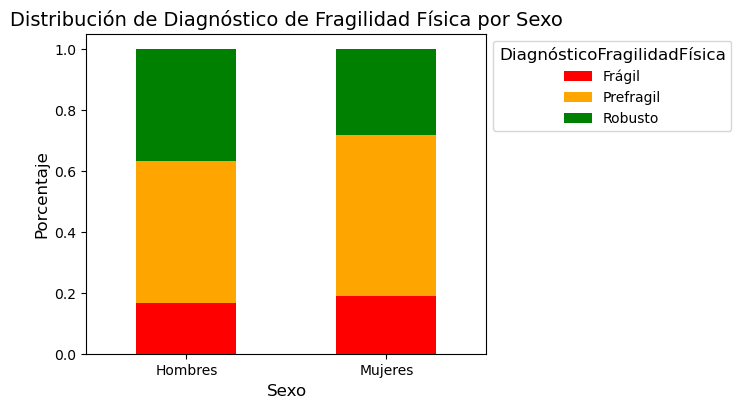

In [9]:
tabla_contingencia = pd.crosstab(df['Sexo'], df['DiagnósticoFragilidadFísica'])

porcentajes = tabla_contingencia.div(tabla_contingencia.sum(1), axis=0)

colores = {
    'Frágil': 'red',
    'Prefragil': 'orange',
    'Robusto': 'green'
}

color_list = [colores[col] for col in porcentajes.columns]

ax = porcentajes.plot(kind='bar', stacked=True, figsize=(8, 4), color=color_list)
plt.title('Distribución de Diagnóstico de Fragilidad Física por Sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='DiagnósticoFragilidadFísica', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.subplots_adjust(left=0.3, right=0.8, top=0.9, bottom=0.1)
plt.show()

##### VISUALIZAMOS COMO AFECTA LA VARIABLE 'Edad' EN EL GRADO DE DETERIORO

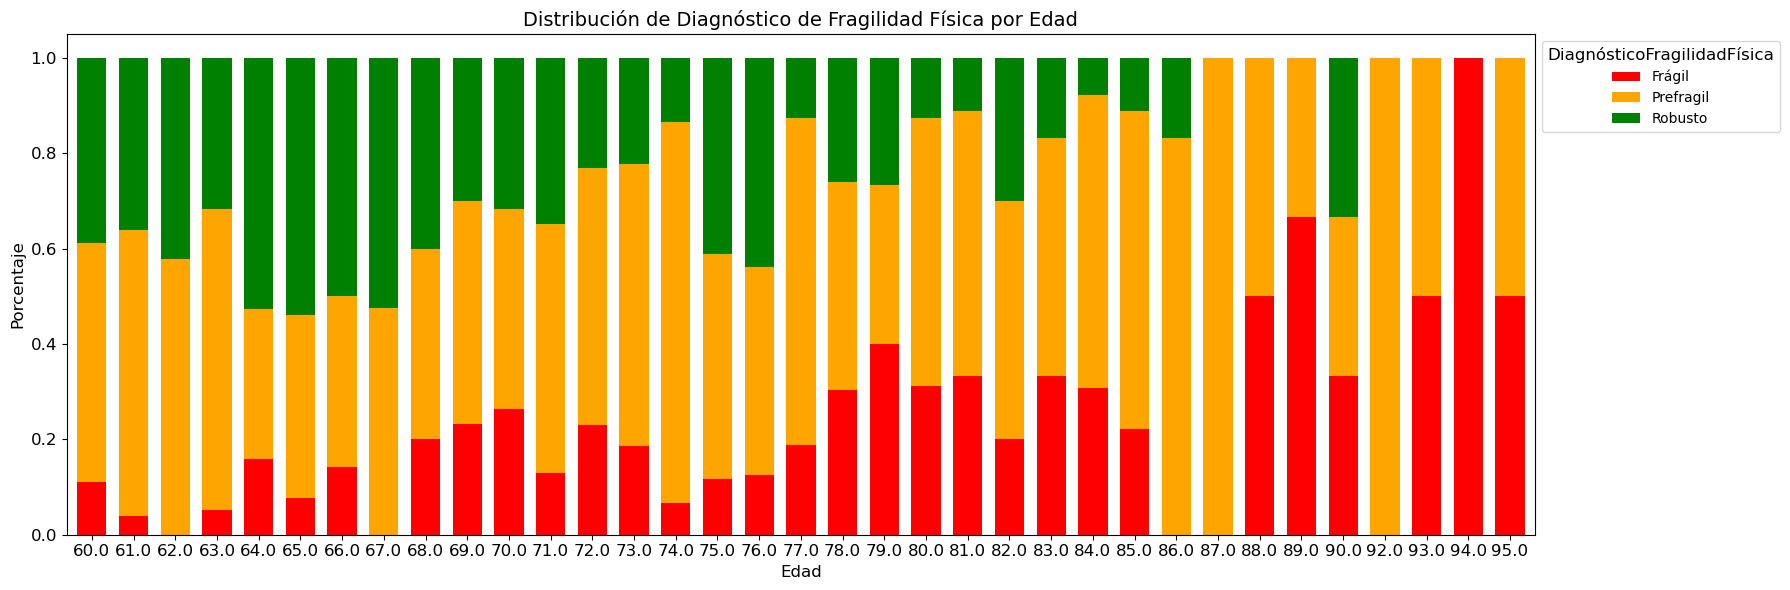

In [10]:
tabla_contingencia = pd.crosstab(df['Edad'], df['DiagnósticoFragilidadFísica'])

porcentajes = tabla_contingencia.div(tabla_contingencia.sum(1), axis=0)

colores = {
    'Frágil': 'red',
    'Prefragil': 'orange',
    'Robusto': 'green'
}

color_list = [colores[col] for col in porcentajes.columns]

ax = porcentajes.plot(kind='bar', stacked=True, figsize=(18, 6), width=0.7, color=color_list)
plt.title('Distribución de Diagnóstico de Fragilidad Física por Edad', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='DiagnósticoFragilidadFísica', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

### ANÁLISIS Y CÁLCULO DE MÉTRICAS CON LOS DATOS PROCESADOS

##### CALCULAMOS LA MATRIZ DE CORRELACION DE TODAS LAS VARIABLES EN EL CONJUNTO DE DATOS

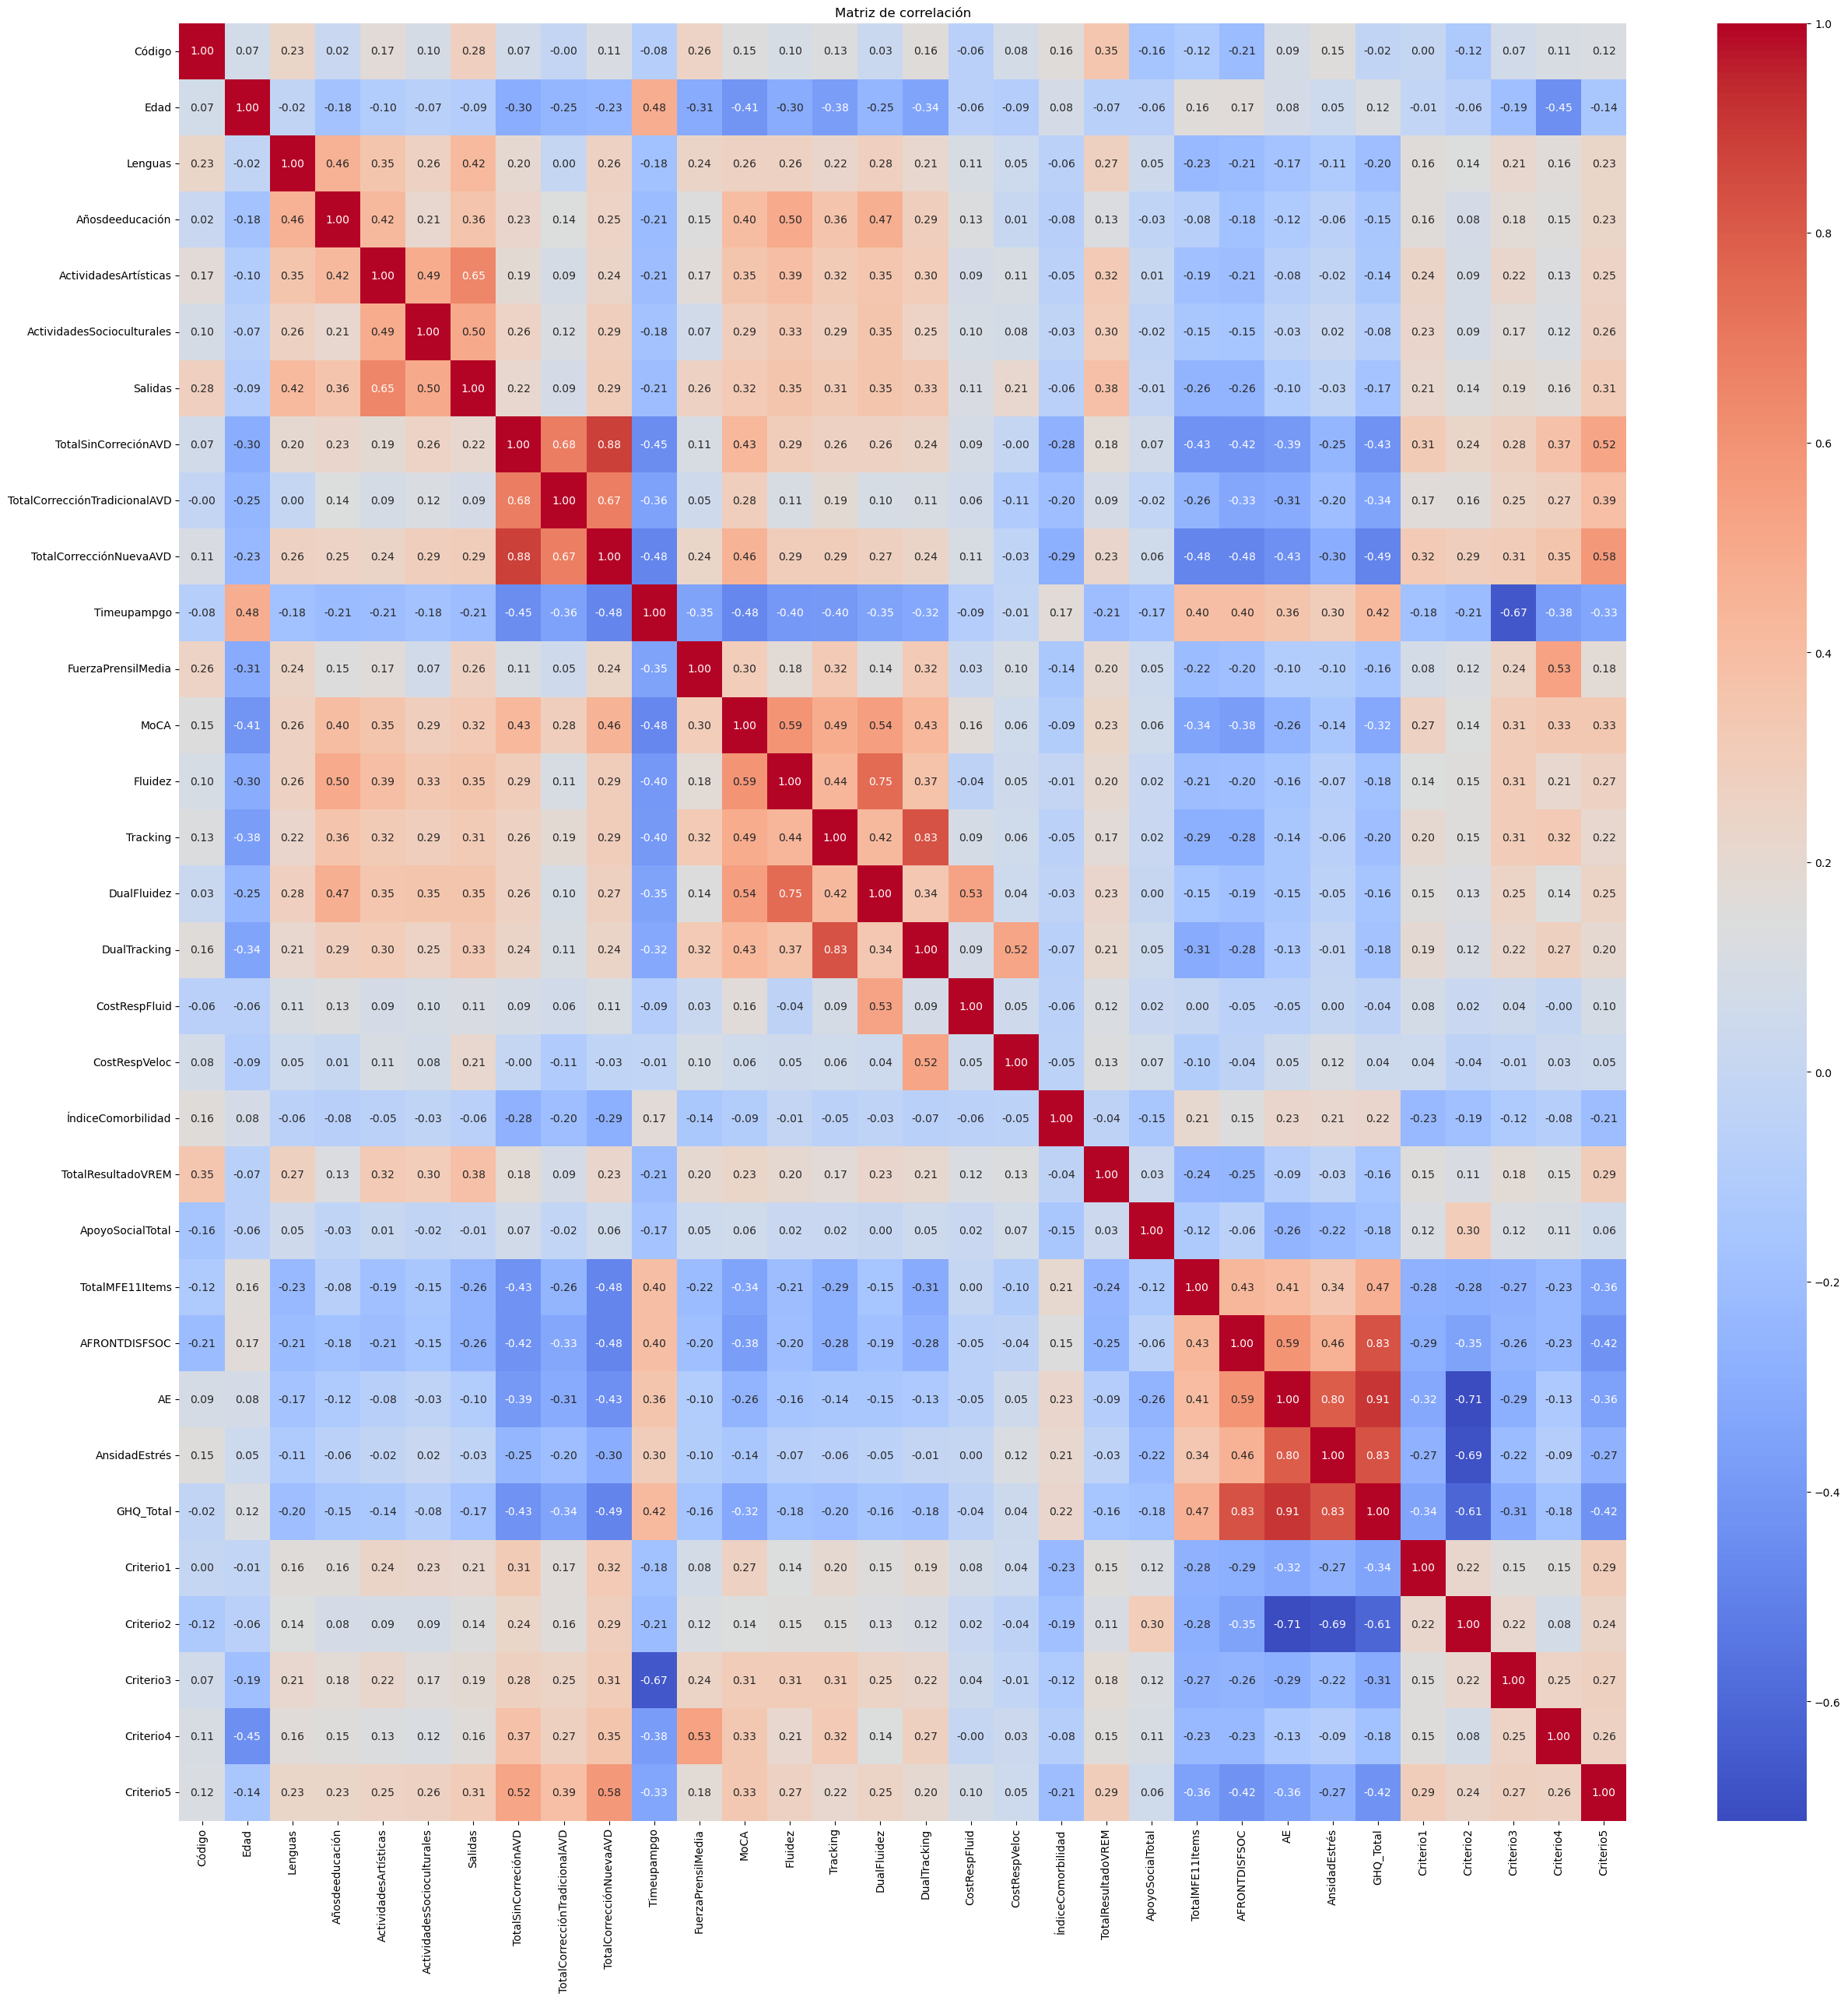

In [11]:
df_numeros = df.select_dtypes(include=['float64', 'int64'])
matriz_corr = df_numeros.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

####### FILTRAMOS LAS CORRELACIONES OBTENIDAS PARA QUEDARNOS CON LAS QUE SUPEREN EL 80%

In [12]:
df_numericas = df.select_dtypes(include=['number'])
df_correlaciones = df_numericas.corr()

correlaciones_altas = df_correlaciones[df_correlaciones.abs() > 0.8]

# Eliminamos las correlaciones de una variable consigo misma (diagonal principal)
np.fill_diagonal(correlaciones_altas.values, np.nan)

correlaciones_altas_series = correlaciones_altas.unstack()

impresos = set()
for idx, correlacion in correlaciones_altas_series.items():
    if not pd.isnull(correlacion) and idx not in impresos:
        inverso_idx = (idx[1], idx[0])
        impresos.add(inverso_idx)
        print(f"{idx}: {correlacion}")

('TotalSinCorreciónAVD', 'TotalCorrecciónNuevaAVD'): 0.8802716372599195
('Tracking', 'DualTracking'): 0.8298399607241698
('AFRONTDISFSOC', 'GHQ_Total'): 0.8312553271086607
('AE', 'GHQ_Total'): 0.9091173606022529
('AnsidadEstrés', 'GHQ_Total'): 0.8315077293616859


##### CALCULAMOS DEL DIAGNÓSTICO DEL GRADO DE FRAGILIDAD USANDO EL MODELO DE FRIED (DiagnósticoFragilidadFísica)

In [13]:
# Hacemos una segunda selección de variables (inputs).
# En este caso no vamos a coger ni los 5 criterios ni otras medidas representativas del grado de fragilidad final de cada paciente

df_fried = df[['Código', 'Lugar', 'FechaEvaluación', 'Edad', 'EdadGrupos' , 'Sexo', 'FechaNacimiento', 'Lenguas', 'Añosdeeducación', 'Cursos', 'ActividadesArtísticas', 'ActividadesSocioculturales', 'Salidas', 'CategoríaProfesional', 'Vive', 'TotalSinCorreciónAVD', 'TotalCorrecciónTradicionalAVD', 'TotalCorrecciónNuevaAVD', 'Timeupampgo', 'FuerzaPrensilMedia', 'MoCA', 'Fluidez', 'Tracking', 'DualFluidez', 'DualTracking', 'CostRespFluid', 'CostRespVeloc', 'PérdidaPesoB', 'EnfermedadesDestacables', 'FármacosoTratamientosMédicos', 'ÍndiceComorbilidad', 'Hospitalizaciones', 'Caídas', 'AntecedentesMemoria', 'Vista', 'Oído', 'MovilidadManos', 'TotalResultadoVREM', 'ClasificaciónVREMRecodificado', 'ApoyoSocialTotal', 'TotalMFE11Items', 'AFRONTDISFSOC', 'AE', 'AnsidadEstrés', 'GHQ_Total']]
df_fried

Código     Lugar FechaEvaluación  Edad EdadGrupos     Sexo  \
0    1101.0  Valencia      2019-03-08  72.0      70-79  Hombres   
1    1109.0  Valencia      2019-03-15  69.0      60-69  Mujeres   
2    1102.0  Valencia      2019-03-08  68.0      60-69  Mujeres   
3    1103.0  Valencia      2019-03-08  69.0      60-69  Mujeres   
4    1104.0  Valencia      2019-03-08  73.0      70-79  Mujeres   
..      ...       ...             ...   ...        ...      ...   
609  3246.0  Portugal      2020-01-28  60.0      60-69  Mujeres   
610  3247.0  Portugal      2020-01-28  64.0      60-69  Hombres   
611  3248.0  Portugal      2020-01-29  69.0      60-69  Mujeres   
612  3249.0  Portugal      2020-01-29  67.0      60-69  Mujeres   
613  3250.0  Portugal      2020-01-30  61.0      60-69  Mujeres   

    FechaNacimiento  Lenguas  Añosdeeducación Cursos  ActividadesArtísticas  \
0        2046-10-04      2.0             15.0     no                    1.0   
1        2050-03-23      1.0             10.0     no                    3.0   
2        2051-06-21      2.0              7.0     no                    1.0   
3        2050-01-31      2.0              9.0     si                    1.0   
4        2045-08-01      2.0             11.0     no                    1.0   
..              ...      ...              ...    ...                    ...   
609      1959-08-03      3.0              6.0     no                    0.0   
610      1956-01-12      1.0              4.0     no                    0.0   
611      1950-07-27      2.0              8.0     no                    0.0   
612      1952-11-09      1.0              4.0     no                    0.0   
613      1958-05-13      1.0              7.0     no                    1.0   

     ActividadesSocioculturales  Salidas  \
0                           3.0      3.0   
1                           1.0      1.0   
2                           4.0      2.0   
3                           2.0      1.0   
4                           4.0      2.0   
..                          ...      ...   
609                         0.0      0.0   
610                         0.0      0.0   
611                         2.0      0.0   
612                         0.0      0.0   
613                         0.0      0.0   

                         CategoríaProfesional           Vive  \
0     Altos funcionarios o de dirección, etc.        Cónyuge   
1    Trabajador cualificado, comerciante, etc        Cónyuge   
2    Trabajador cualificado, comerciante, etc          Hijos   
3                   Obrero/a no cualificado/a        Cónyuge   
4                   Obrero/a no cualificado/a        Cónyuge   
..                                        ...            ...   
609                 Obrero/a no cualificado/a  Cónyuge+hijos   
610                 Obrero/a no cualificado/a        Cónyuge   
611                             Sin ocupación          Hijos   
612                             Sin ocupación        Cónyuge   
613                 Obrero/a no cualificado/a  Cónyuge+hijos   

     TotalSinCorreciónAVD  TotalCorrecciónTradicionalAVD  \
0                     6.0                          100.0   
1                     8.0                          100.0   
2                     7.0                           87.5   
3                     8.0                          100.0   
4                     8.0                          100.0   
..                    ...                            ...   
609                   8.0                          100.0   
610                   6.0                          100.0   
611                   8.0                          100.0   
612                   8.0                          100.0   
613                   8.0                          100.0   

     TotalCorrecciónNuevaAVD  Timeupampgo  FuerzaPrensilMedia  MoCA  Fluidez  \
0                      100.0          9.9           25.700000  28.0     14.0   
1                      100.0         10.3           18.030000  24.0     

####### CALCULAMOS LA MATRIZ DE CORRELACIÓN

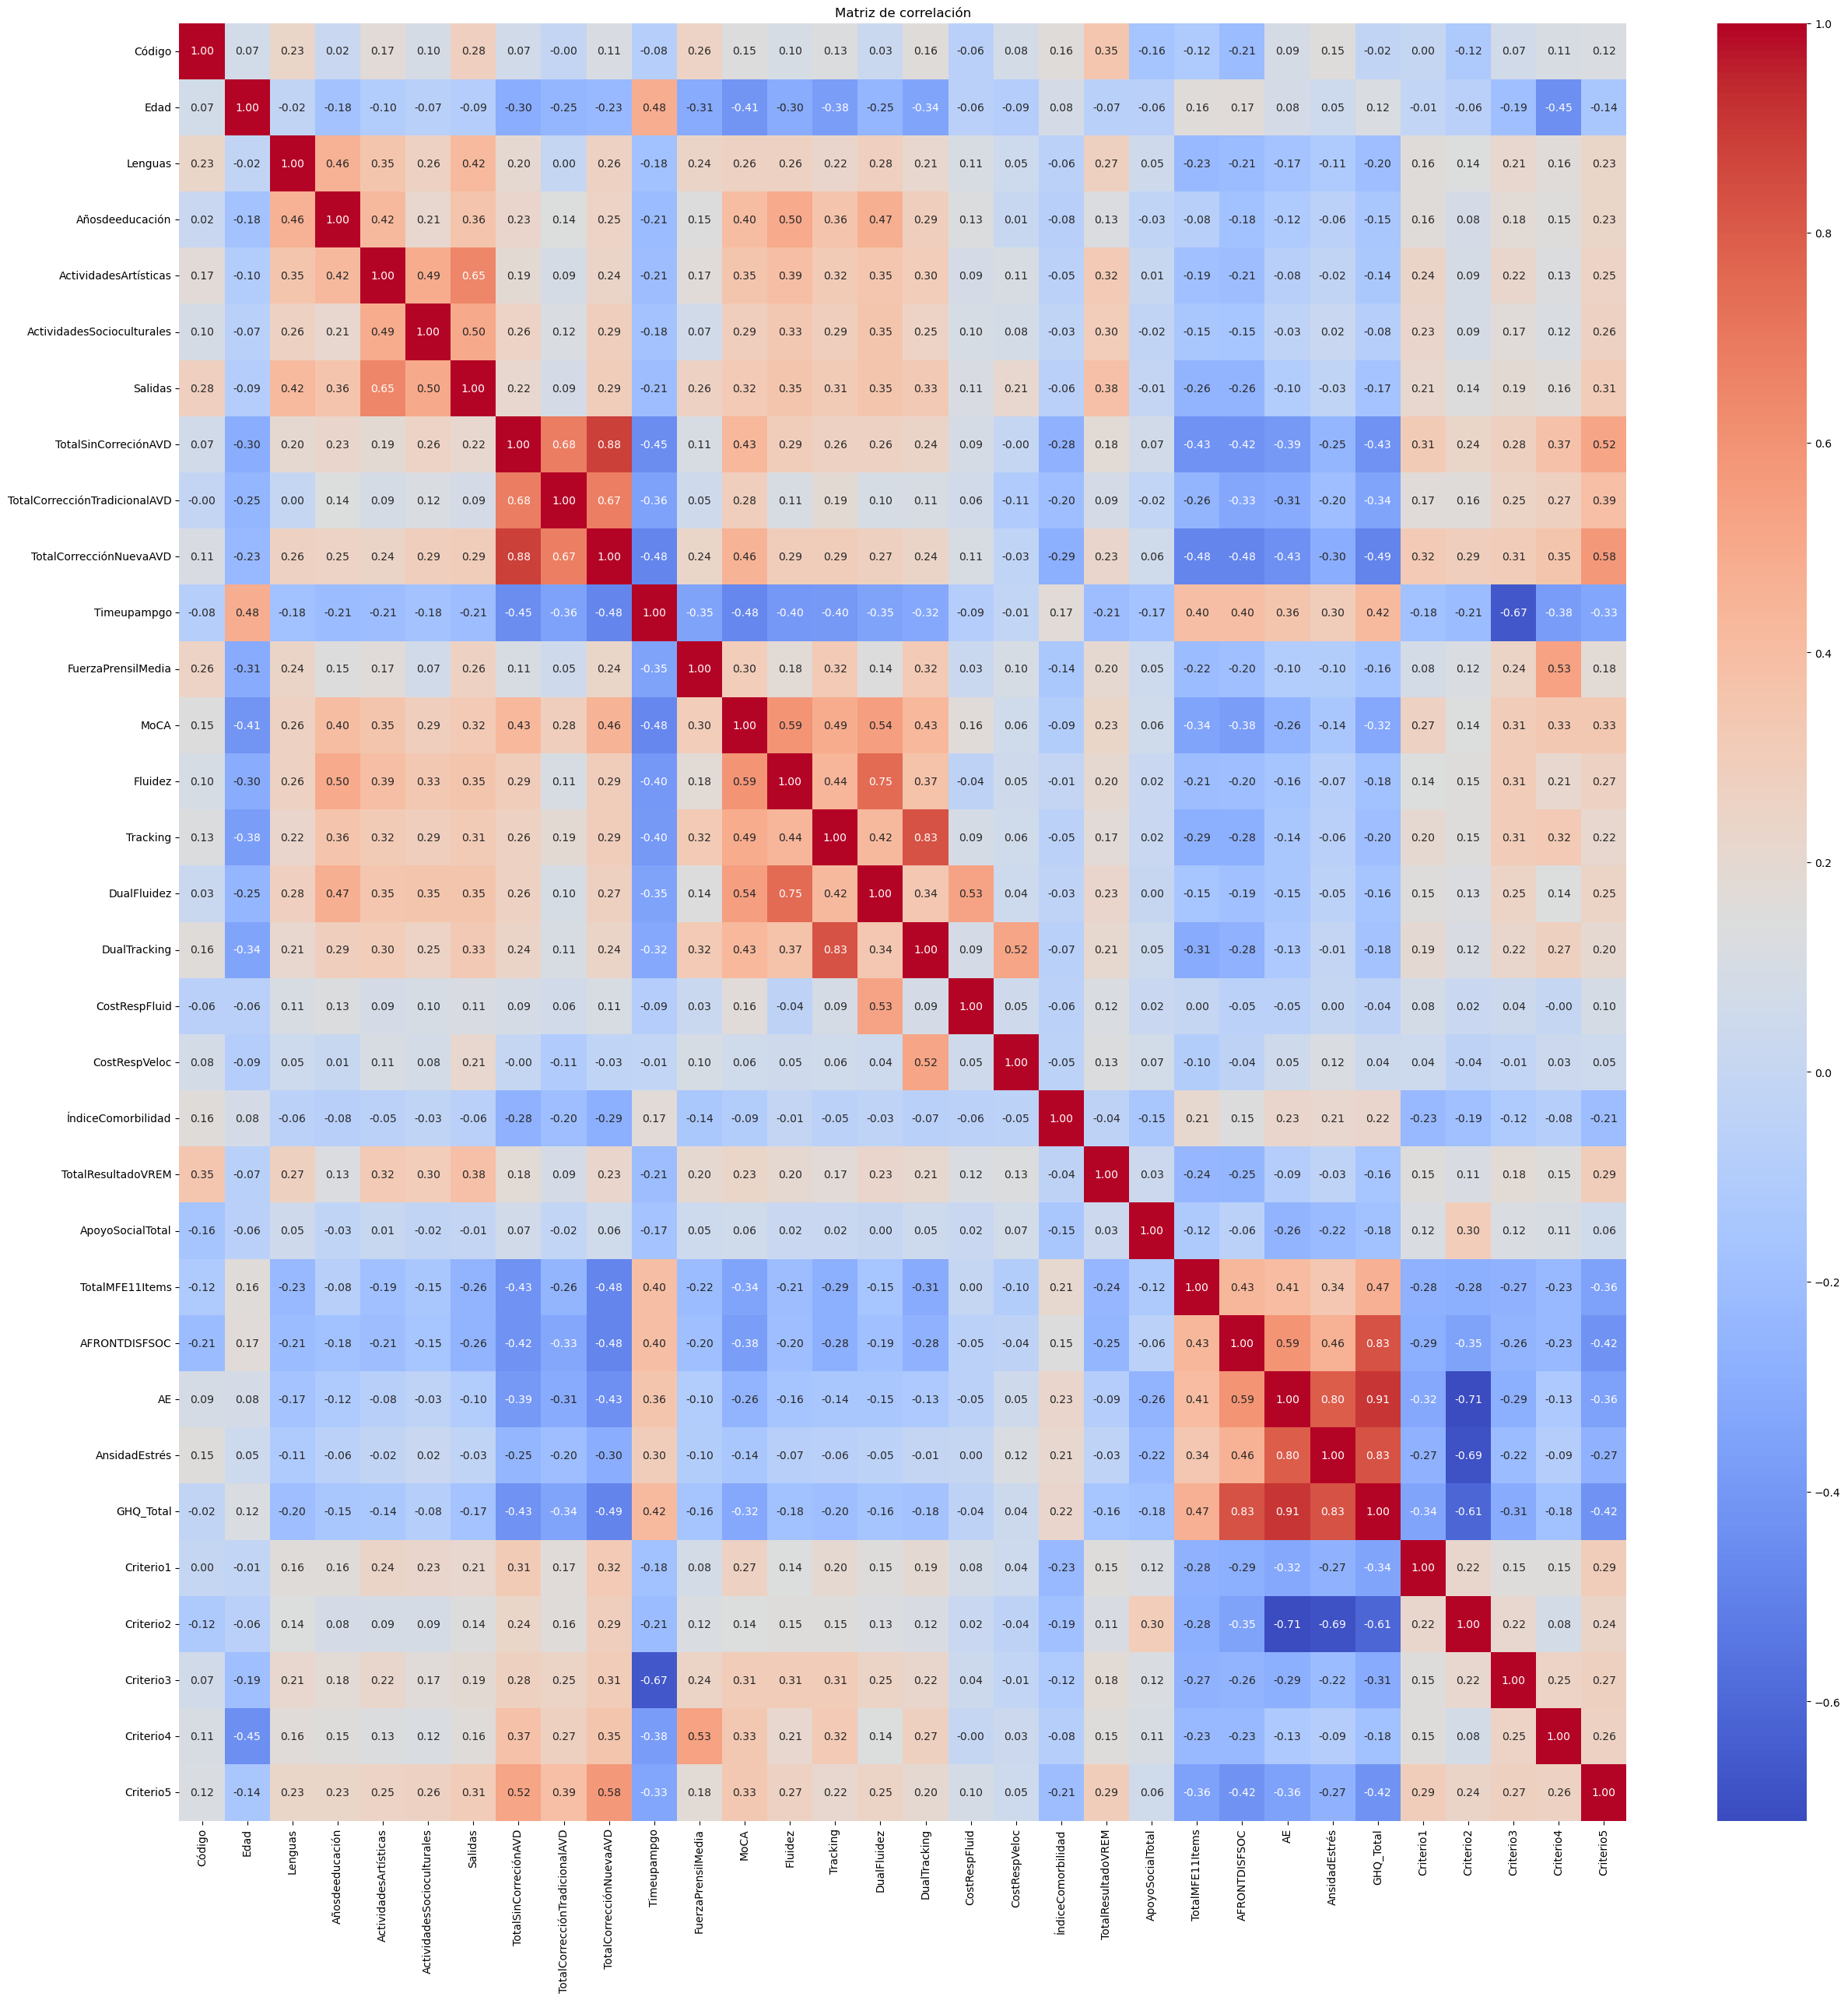

In [14]:
df_numeros = df_fried.select_dtypes(include=['float64', 'int64'])
matriz_corr1 = df_numeros.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

####### FILTRAMOS LAS CORRELACIONES OBTENIDAS PARA QUEDARNOS CON LAS QUE SUPEREN EL 80%

In [15]:
correlaciones_altas = matriz_corr1[matriz_corr1.abs() > 0.8]

np.fill_diagonal(correlaciones_altas.values, np.nan)

correlaciones_altas_series = correlaciones_altas.unstack()

impresos = set()
for idx, correlacion in correlaciones_altas_series.items():
    if not pd.isnull(correlacion) and idx not in impresos:
        inverso_idx = (idx[1], idx[0])
        impresos.add(inverso_idx)
        print(f"{idx}: {correlacion}")

('TotalSinCorreciónAVD', 'TotalCorrecciónNuevaAVD'): 0.8802716372599195
('Tracking', 'DualTracking'): 0.8298399607241698
('AFRONTDISFSOC', 'GHQ_Total'): 0.8312553271086607
('AE', 'GHQ_Total'): 0.9091173606022529
('AnsidadEstrés', 'GHQ_Total'): 0.8315077293616859


####### CALCULAMOS DE FRIED USANDO LAS COLUMNAS DE LOS 5 CRITERIOS

In [16]:
# los 5 criterios son variables binarias, voy a dar por echo que 1 = Si y 2 = No
df_criterios = df[['Criterio1', 'Criterio2', 'Criterio3', 'Criterio4', 'Criterio5']]

# Calcular el total de "sí" por fila
df_criterios['Puntuacion'] = df_criterios.eq(1).sum(axis=1)

# Clasificación del grado de deterioro basado en 'Puntuacion'
df_criterios['GradoDeterioro'] = df_criterios['Puntuacion'].apply(lambda x: 'Robusto' if x == 0 else ('Prefragil' if 1 <= x <= 2 else 'Frágil'))

grado_deterioro = df_criterios[['Puntuacion', 'GradoDeterioro']].copy()

df_criterios

Criterio1  Criterio2  Criterio3  Criterio4  Criterio5  Puntuacion  \
0          2.0        2.0        2.0        1.0        2.0           1   
1          2.0        2.0        2.0        2.0        2.0           0   
2          1.0        2.0        2.0        2.0        2.0           1   
3          2.0        2.0        1.0        2.0        2.0           1   
4          2.0        1.0        2.0        2.0        2.0           1   
..         ...        ...        ...        ...        ...         ...   
609        2.0        2.0        2.0        2.0        2.0           0   
610        1.0        2.0        2.0        2.0        1.0           2   
611        2.0        2.0        2.0        1.0        2.0           1   
612        2.0        2.0        2.0        1.0        2.0           1   
613        1.0        2.0        2.0        2.0        2.0           1   

    GradoDeterioro  
0        Prefragil  
1          Robusto  
2        Prefragil  
3        Prefragil  
4        Prefragil  
..             ...  
609        Robusto  
610      Prefragil  
611      Prefragil  
612      Prefragil  
613      Prefragil  

[529 rows x 7 columns]

In [17]:
df_criterios['GradoDeterioro'].value_counts()

Prefragil    268
Robusto      166
Frágil        95
Name: GradoDeterioro, dtype: int64

####### COMPROBAMOS EL NÚMERO DE COINCIDENCIAS ENTRE LA VARIABLE ORIGINAL 'DiagnósticoFragilidadFísica' Y LA QUE ACABAMOS DE CALCULAR 'GradoDeterioro'

In [18]:
matching_rows = df['DiagnósticoFragilidadFísica'].isin(df_criterios['GradoDeterioro'])
matching_rows.sum() # coincidencias (529 de 529)

529

In [19]:
# En el caso de no obtener 100% de coincidencias, comprobamos en que casos ocurre esto.

merged_df = df.merge(df_criterios, how='outer', left_on='DiagnósticoFragilidadFísica', right_on='GradoDeterioro', indicator=True)

filas_no_corresponden = merged_df[merged_df['_merge'] != 'both']

codigos_no_corresponden = filas_no_corresponden['Código'].tolist()

filas_eliminadas = df[df['Código'].isin(codigos_no_corresponden)]

df_filtrado = df[~df['Código'].isin(codigos_no_corresponden)]

In [20]:
# Para comprobar el numero de datos pertenecientes a la categoria 'Faltan datos'

numero_de_faltantes = (df['DiagnósticoFragilidadFísica'] == 'Faltan datos').sum()
numero_de_faltantes

0

In [21]:
df_fragil = (df['DiagnósticoFragilidadFísica'] == 'Frágil')
df_criterios_fragil = (df_criterios['GradoDeterioro'] == 'Frágil')

filas_fragil = df[df_fragil != df_criterios_fragil]

In [22]:
df_prefragil = (df['DiagnósticoFragilidadFísica'] == 'Prefragil')
df_criterios_prefragil = (df_criterios['GradoDeterioro'] == 'Prefragil')

filas_prefragil = df[df_prefragil != df_criterios_prefragil]

In [23]:
df_robusto = (df['DiagnósticoFragilidadFísica'] == 'Robusto')
df_criterios_robusto = (df_criterios['GradoDeterioro'] == 'Robusto')

filas_robusto = df[df_robusto != df_criterios_robusto]

In [24]:
# Número de pacientes que no coinciden de cada categoria

print((df_fragil != df_criterios_fragil).sum())
print((df_prefragil != df_criterios_prefragil).sum())
print((df_robusto != df_criterios_robusto).sum())

0
0
0


####### CALCULAMOS LA CORRELACION ENTRE LOS 5 CRITERIOS Y EL RESTO DE COLUMNAS

In [25]:
criterios = ['Criterio1', 'Criterio2', 'Criterio3', 'Criterio4', 'Criterio5']

df_numericas = df.select_dtypes(include=['number'])

otras_variables = [col for col in df_numericas.columns if col not in criterios]

df_criterios = df_numericas[criterios]
df_otras_variables = df_numericas[otras_variables]

correlaciones = {}
for col_criterio in criterios:
    for col_otra_variable in otras_variables:
        correlacion = df_criterios[col_criterio].corr(df_otras_variables[col_otra_variable])
        correlaciones[(col_criterio, col_otra_variable)] = correlacion


df_correlaciones = pd.DataFrame(list(correlaciones.items()), columns=['Variables', 'Correlacion'])
df_correlaciones.set_index('Variables', inplace=True)

df_correlaciones

Correlacion
Variables                                      
(Criterio1, Código)                    0.000920
(Criterio1, Edad)                     -0.012728
(Criterio1, Lenguas)                   0.158920
(Criterio1, Añosdeeducación)           0.160545
(Criterio1, ActividadesArtísticas)     0.240523
...                                         ...
(Criterio5, TotalMFE11Items)          -0.356011
(Criterio5, AFRONTDISFSOC)            -0.423585
(Criterio5, AE)                       -0.357421
(Criterio5, AnsidadEstrés)            -0.267937
(Criterio5, GHQ_Total)                -0.424296

[135 rows x 1 columns]

####### FILTRAMOS LAS CORRELACIONES OBTENIDAS PARA QUEDARNOS CON LAS QUE SUPEREN EL 60%

En este caso filtramos las que sean mayor de un 60% porque en este caso no hay ninguna que supere el criterio anterior (80%)

In [26]:
df_filtrado = df_correlaciones[df_correlaciones['Correlacion'].abs() > 0.6].copy()

df_filtrado['Correlacion'] = df_filtrado['Correlacion'].abs()

print(df_filtrado)

                            Correlacion
Variables                              
(Criterio2, AE)                0.713737
(Criterio2, AnsidadEstrés)     0.687119
(Criterio2, GHQ_Total)         0.612174
(Criterio3, Timeupampgo)       0.671980


##### ANÁLISIS PROPORSION TEST USANDO 'CHI-SQUARED'

####### COMPARAMOS LA VARIABLE 'Sexo' CON EL RESTO DE VARIABLES

Hacemos una filtración para quedarnos solo con los 10 valores más altos

In [27]:
results = []

for column in df.columns[df.columns != 'Sexo']:
    contingency_table = pd.crosstab(df['Sexo'], df[column])
    observed_frequencies_by_sex = contingency_table.sum(axis=1)
    chi2_stat, p_val = chisquare(observed_frequencies_by_sex)
    results.append((column, chi2_stat, p_val))

results.sort(key=lambda x: x[1], reverse=True)

for i, (column, chi2_stat, p_val) in enumerate(results[:10], start=1):
    print(f"Variable: {column}")
    print("   Chi-cuadrado:", chi2_stat)
    print("   Valor p:", p_val)

# Cuanto mayor sea el valor de Chi-cuadrado, mayor relación habrá entre la variable sexo y la variable comparada

Variable: FechaEvaluación
   Chi-cuadrado: 41.98881431767338
   Valor p: 9.179702778976069e-11
Variable: FechaNacimiento
   Chi-cuadrado: 35.77292576419214
   Valor p: 2.217075951354548e-09
Variable: GHQ_Total
   Chi-cuadrado: 33.125475285171106
   Valor p: 8.639927205075769e-09
Variable: AFRONTDISFSOC
   Chi-cuadrado: 33.0
   Valor p: 9.215887201256233e-09
Variable: AE
   Chi-cuadrado: 33.0
   Valor p: 9.215887201256233e-09
Variable: Criterio4
   Chi-cuadrado: 33.0
   Valor p: 9.215887201256233e-09
Variable: TotalResultadoVREM
   Chi-cuadrado: 32.938579654510555
   Valor p: 9.511685281462128e-09
Variable: Lenguas
   Chi-cuadrado: 32.56356736242884
   Valor p: 1.1535702423779438e-08
Variable: Código
   Chi-cuadrado: 32.44045368620038
   Valor p: 1.2290120910080983e-08
Variable: Lugar
   Chi-cuadrado: 32.44045368620038
   Valor p: 1.2290120910080983e-08


####### COMPARAMOS LA VARIABLE 'Sexo' CON LA VARIABLE 'DiagnósticoFragilidadFísica'

In [28]:
contingency_table = pd.crosstab(df['Sexo'], df['DiagnósticoFragilidadFísica'])
observed_frequencies = contingency_table.values
observed_frequencies_by_sex = observed_frequencies.sum(axis=1)
chi2_stat, p_val = chisquare(observed_frequencies_by_sex)

print("Variable: DiagnósticoFragilidadFísica")
print("Chi-cuadrado:", chi2_stat)
print("Valor p:", p_val)

Variable: DiagnósticoFragilidadFísica
Chi-cuadrado: 32.44045368620038
Valor p: 1.2290120910080983e-08


####### COMPARAMOS LA VARIABLE 'Edad' CON LA VARIABLE 'DiagnósticoFragilidadFísica'

In [29]:
contingency_table = pd.crosstab(df['Edad'], df['DiagnósticoFragilidadFísica'])
observed_frequencies = contingency_table.values
observed_frequencies_by_sex = observed_frequencies.sum(axis=1)
chi2_stat, p_val = chisquare(observed_frequencies_by_sex)

print("Variable: DiagnósticoFragilidadFísica")
print("Chi-cuadrado:", chi2_stat)
print("Valor p:", p_val)

Variable: DiagnósticoFragilidadFísica
Chi-cuadrado: 193.95841209829868
Valor p: 2.6667416021181963e-24


####### DIVIDIMOS LA VARIABLE 'DiagnósticoFragilidadFísica' EN DOS GRUPOS Y CALCULAMOS LA INFLUENCIA DE LA VARIABLE 'Sexo'

In [30]:
GrupoFrágil = df[df['DiagnósticoFragilidadFísica'].isin(['Frágil', 'Prefragil'])] # Grupo 1: Fragil + Prefragil
GrupoRobusto = df[df['DiagnósticoFragilidadFísica'] == 'Robusto'] # Grupo 2: Robusto

contingency_table1 = pd.crosstab(df['Sexo'], GrupoFrágil['DiagnósticoFragilidadFísica'])
observed_frequencies1 = contingency_table1.values
observed_frequencies_by_sex1 = observed_frequencies1.sum(axis=1)
chi2_stat1, p_val1 = chisquare(observed_frequencies_by_sex1)

contingency_table2 = pd.crosstab(df['Sexo'], GrupoRobusto['DiagnósticoFragilidadFísica'])
observed_frequencies2 = contingency_table2.values
observed_frequencies_by_sex2 = observed_frequencies2.sum(axis=1)
chi2_stat2, p_val2 = chisquare(observed_frequencies_by_sex2)

print("Variable: DiagnósticoFragilidadFísica")

print("Chi-cuadrado GrupoFrágil:", chi2_stat1)
print("P-valor GrupoFrágil:", p_val1)

print("Chi-cuadrado GrupoRobusto:", chi2_stat2)
print("P-valor GrupoRobusto:", p_val2)

# La variable sexo afecta más cuando los pacientes se encuentran en estado 'Frágil o Prefrágil'

Variable: DiagnósticoFragilidadFísica
Chi-cuadrado GrupoFrágil: 33.94214876033058
P-valor GrupoFrágil: 5.677532849253414e-09
Chi-cuadrado GrupoRobusto: 2.4096385542168677
P-valor GrupoRobusto: 0.12059020647279343


##### RANDOM FOREST

####### APLICAMOS RANDOM FOREST DE TODAS LAS CARACTERISTICAS SELECCIONADAS PARA EL MODELO DE FRIED (siendo DiagnósticoFragilidadFísica nuestra variable de interés)

In [31]:
df1 = df.dropna()

X1 = pd.get_dummies(df1.drop('DiagnósticoFragilidadFísica', axis=1), drop_first=True)
y1 = df1['DiagnósticoFragilidadFísica']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

rf_classifier1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier1.fit(X_train1, y_train1)

y_pred1 = rf_classifier1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Precisión del modelo:", accuracy1)

Precisión del modelo: 0.9864864864864865


In [32]:
correlation_matrix = X1.corr()
correlation_matrix.head()

Código      Edad   Lenguas  Añosdeeducación  \
Código                 1.000000  0.089574  0.444390         0.009452   
Edad                   0.089574  1.000000  0.007054        -0.167418   
Lenguas                0.444390  0.007054  1.000000         0.500095   
Añosdeeducación        0.009452 -0.167418  0.500095         1.000000   
ActividadesArtísticas  0.299405 -0.072543  0.383885         0.441250   

                       ActividadesArtísticas  ActividadesSocioculturales  \
Código                              0.299405                    0.254049   
Edad                               -0.072543                   -0.046268   
Lenguas                             0.383885                    0.304952   
Añosdeeducación                     0.441250                    0.254634   
ActividadesArtísticas               1.000000                    0.492992   

                        Salidas  TotalSinCorreciónAVD  \
Código                 0.352909              0.111318   
Edad                  -0.081030             -0.283204   
Lenguas                0.450980              0.183620   
Añosdeeducación        0.430178              0.226251   
ActividadesArtísticas  0.673309              0.158729   

                       TotalCorrecciónTradicionalAVD  TotalCorrecciónNuevaAVD  \
Código                                     -0.347648                 0.134020   
Edad                                       -0.248143                -0.203081   
Lenguas                                    -0.105778                 0.223245   
Añosdeeducación                             0.125397                 0.244119   
ActividadesArtísticas                       0.006154                 0.175214   

                       Timeupampgo  FuerzaPrensilMedia      MoCA   Fluidez  \
Código                   -0.160384            0.193110  0.134371  0.145179   
Edad                      0.487723           -0.314591 -0.433039 -0.247439   
Lenguas                  -0.158782            0.180922  0.299859  0.359279   
Añosdeeducación          -0.199640            0.163034  0.450173  0.519000   
ActividadesArtísticas    -0.155534            0.125413  0.362492  0.393528   

                       Tracking  DualFluidez  DualTracking  CostRespFluid  \
Código                 0.054300     0.228538      0.064362       0.125710   
Edad                  -0.360161    -0.168267     -0.322111      -0.000277   
Lenguas                0.180877     0.375513      0.199367       0.107450   
Añosdeeducación        0.365386     0.493894      0.288690       0.108935   
ActividadesArtísticas  0.286211     0.377680      0.262276       0.099300   

                       CostRespVeloc  ÍndiceComorbilidad  TotalResultadoVREM  \
Código                      0.017636           -0.081972            0.464570   
Edad                       -0.114229            0.069225           -0.046698   
Lenguas                     0.098469           -0.025461            0.350013   
Añosdeeducación             0.040300           -0.051344            0.137148   
ActividadesArtísticas       0.097315           -0.046566            0.355902   

                       ApoyoSocialTotal  TotalMFE11Items  AFRONTDISFSOC  \
Código                         0.083276        -0.273149      -0.128788   
Edad                          -0.050910         0.136093       0.132238   
Lenguas                        0.078985        -0.181084      -0.154435   
Añosdeeducación               -0.012045        -0.011105      -0.175684   
ActividadesArtísticas          0.044812        -0.129093      -0.191418   

                             AE  AnsidadEstrés  GHQ_Total  Criterio1  \
Código                -0.106594      -0.077968  -0.120822   0.161218   
Edad                   0.008035      -0.028151   0.042515  -0.005084   
Lenguas               -0.153094      -0.072727  -0.158365   0.142776   
Añosdeeducación       -0.080498      -0.008764  -0.119097   0.159939   
ActividadesArtísticas -0.048316       0.007075  -0.098464   0.242317   

        

####### CALCULAMOS LAS VARIABLES CON MÁS IMPORTANCIA

In [33]:
feature_importance = rf_classifier1.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X1.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(10)['Feature'].tolist() # seleccionar las 10 primeras
print(top_features)

# Obteniendo como resultado: 'DiagnósticoFragilidadCognitiva', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS', 'Timeupampgo', 'TotalResultadoVREM', 'Criterio3'

['DiagnósticoFragilidadCognitiva_Prefrágil- cognitivamente normal', 'DiagnósticoFragilidadCognitiva_Robusto/a- cognitivamente normal', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS_Prefrágil + cognitivamente normal', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS_Robusto + cognitivamente normal', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS_Recodificado_Pre- o fragil y cognitivamente sanos', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS_Recodificado_Robustos y cogntivamente sanos', 'Criterio3', 'Timeupampgo', 'Criterio4', 'DiagnósticoFragilidadCognitiva_Frágil- deterioro cognitivo']


####### APLICAMOS RANDOM FOREST DE TODAS LAS CARACTERISTICAS SELECCIONADAS MENOS 'Sexo' PARA EL MODELO DE FRIED (siendo DiagnósticoFragilidadFísica nuestra variable de interés)

In [34]:
df2 = df.drop(['Sexo'], axis=1)
df2 = df2.dropna()

X2 = pd.get_dummies(df2.drop('DiagnósticoFragilidadFísica', axis=1), drop_first=True)
y2 = df2['DiagnósticoFragilidadFísica']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier2.fit(X_train2, y_train2)

y_pred2 = rf_classifier2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Precisión del modelo:", accuracy2)

Precisión del modelo: 1.0


In [35]:
correlation_matrix = X2.corr()
correlation_matrix.head()

Código      Edad   Lenguas  Añosdeeducación  \
Código                 1.000000  0.089574  0.444390         0.009452   
Edad                   0.089574  1.000000  0.007054        -0.167418   
Lenguas                0.444390  0.007054  1.000000         0.500095   
Añosdeeducación        0.009452 -0.167418  0.500095         1.000000   
ActividadesArtísticas  0.299405 -0.072543  0.383885         0.441250   

                       ActividadesArtísticas  ActividadesSocioculturales  \
Código                              0.299405                    0.254049   
Edad                               -0.072543                   -0.046268   
Lenguas                             0.383885                    0.304952   
Añosdeeducación                     0.441250                    0.254634   
ActividadesArtísticas               1.000000                    0.492992   

                        Salidas  TotalSinCorreciónAVD  \
Código                 0.352909              0.111318   
Edad                  -0.081030             -0.283204   
Lenguas                0.450980              0.183620   
Añosdeeducación        0.430178              0.226251   
ActividadesArtísticas  0.673309              0.158729   

                       TotalCorrecciónTradicionalAVD  TotalCorrecciónNuevaAVD  \
Código                                     -0.347648                 0.134020   
Edad                                       -0.248143                -0.203081   
Lenguas                                    -0.105778                 0.223245   
Añosdeeducación                             0.125397                 0.244119   
ActividadesArtísticas                       0.006154                 0.175214   

                       Timeupampgo  FuerzaPrensilMedia      MoCA   Fluidez  \
Código                   -0.160384            0.193110  0.134371  0.145179   
Edad                      0.487723           -0.314591 -0.433039 -0.247439   
Lenguas                  -0.158782            0.180922  0.299859  0.359279   
Añosdeeducación          -0.199640            0.163034  0.450173  0.519000   
ActividadesArtísticas    -0.155534            0.125413  0.362492  0.393528   

                       Tracking  DualFluidez  DualTracking  CostRespFluid  \
Código                 0.054300     0.228538      0.064362       0.125710   
Edad                  -0.360161    -0.168267     -0.322111      -0.000277   
Lenguas                0.180877     0.375513      0.199367       0.107450   
Añosdeeducación        0.365386     0.493894      0.288690       0.108935   
ActividadesArtísticas  0.286211     0.377680      0.262276       0.099300   

                       CostRespVeloc  ÍndiceComorbilidad  TotalResultadoVREM  \
Código                      0.017636           -0.081972            0.464570   
Edad                       -0.114229            0.069225           -0.046698   
Lenguas                     0.098469           -0.025461            0.350013   
Añosdeeducación             0.040300           -0.051344            0.137148   
ActividadesArtísticas       0.097315           -0.046566            0.355902   

                       ApoyoSocialTotal  TotalMFE11Items  AFRONTDISFSOC  \
Código                         0.083276        -0.273149      -0.128788   
Edad                          -0.050910         0.136093       0.132238   
Lenguas                        0.078985        -0.181084      -0.154435   
Añosdeeducación               -0.012045        -0.011105      -0.175684   
ActividadesArtísticas          0.044812        -0.129093      -0.191418   

                             AE  AnsidadEstrés  GHQ_Total  Criterio1  \
Código                -0.106594      -0.077968  -0.120822   0.161218   
Edad                   0.008035      -0.028151   0.042515  -0.005084   
Lenguas               -0.153094      -0.072727  -0.158365   0.142776   
Añosdeeducación       -0.080498      -0.008764  -0.119097   0.159939   
ActividadesArtísticas -0.048316       0.007075  -0.098464   0.242317   

        

####### CALCULAMOS LAS VARIABLES CON MÁS IMPORTANCIA

In [36]:
feature_importance = rf_classifier2.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X2.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(10)['Feature'].tolist() # seleccionar las 10 primeras
print(top_features)

# Obteniendo como resultado: 'DiagnósticoFragilidadCognitiva', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS', 'Criterio3', 'Timeupampgo', 'AE'

['DiagnósticoFragilidadCognitiva_Prefrágil- cognitivamente normal', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS_Robusto + cognitivamente normal', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS_Recodificado_Robustos y cogntivamente sanos', 'DiagnósticoFragilidadCognitiva_Robusto/a- cognitivamente normal', 'Criterio3', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS_Prefrágil + cognitivamente normal', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS_Recodificado_Pre- o fragil y cognitivamente sanos', 'Timeupampgo', 'DiagnósticoFragilidadCognitiva_Frágil- deterioro cognitivo', 'Criterio4']


##### ARREGLO DE VARIABLES

####### Eliminamos las columnas que no queremos incluir en el analisis de Rockwood (hemos tenido en cuenta solo las que forman parte de algún tipo de fragilidad)

In [37]:
df_rockwood = df.drop(columns=['Código' ,'FechaEvaluación', 'EdadGrupos','FechaNacimiento','TotalCorrecciónTradicionalAVD', 'TotalCorrecciónNuevaAVD', 'TotalResultadoVREM', 'DiagnósticoFragilidadFísica', 'DiagnósticoFragilidadCognitiva', 'DeterioroCognitivoNormal_DCL_DCS', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS', 'ValenciaNormalDCS', 'SantiagoNormalDCS', 'DiagnósticoFragilidadFísicaCognitiva_DCL_DCS_Recodificado'])

####### CONTAMOS EL NÚMERO DE VALORES DE CADA INDIVIDUO EN LAS VARIABLES QUE REQUIEREN DE ESTE CÁLCULO

In [38]:
def contar_enfermedades(enfermedades):
    if pd.isna(enfermedades) or enfermedades.lower() == 'ninguna':
        return 0
    else:
        enfermedades = enfermedades.replace(' y ', ', ')
        lista_enfermedades = enfermedades.split(', ')
        return len(lista_enfermedades)

df['EnfermedadesDestacables'] = df['EnfermedadesDestacables'].apply(contar_enfermedades)
df['FármacosoTratamientosMédicos'] = df['FármacosoTratamientosMédicos'].apply(contar_enfermedades)

df_rockwood['EnfermedadesDestacables'] = df_rockwood['EnfermedadesDestacables'].apply(contar_enfermedades)
df_rockwood['FármacosoTratamientosMédicos'] = df_rockwood['FármacosoTratamientosMédicos'].apply(contar_enfermedades)

####### NORMALIZAMOS LAS VARIABLES NUMÉRICAS PARA QUE ESTEN EN EL RANGO [0,1]

In [39]:
numeric_vars = ['Edad', 'Lenguas', 'Añosdeeducación', 'ActividadesArtísticas', 'ActividadesSocioculturales', 'Salidas', 'TotalSinCorreciónAVD', 'Timeupampgo', 'FuerzaPrensilMedia', 'MoCA', 'Fluidez',
                'Tracking', 'DualFluidez', 'DualTracking', 'CostRespFluid', 'CostRespVeloc', 'EnfermedadesDestacables', 'FármacosoTratamientosMédicos', 'ÍndiceComorbilidad', 'ApoyoSocialTotal', 'TotalMFE11Items',
               'AFRONTDISFSOC', 'AE', 'AnsidadEstrés', 'GHQ_Total']

scaler = MinMaxScaler()

df_rockwood[numeric_vars] = scaler.fit_transform(df_rockwood[numeric_vars])

####### A LAS COLUMNAS NO NUMÉRICAS QUE LO REQUIEREN, LES APLICAMOS UNA RECODIFICACIÓN PARA POSTERIORMENTE REESCALAR LOS DATOS EN FUNCIÓN DEL RANGO [0,1]

In [40]:
mapeo_valores = {
    'Muy activo': 3,
    'Activo': 2,
    'Moderadamente activo': 1,
    'Sedentario': 0
}

df_rockwood['ClasificaciónVREMRecodificado'] = df_rockwood['ClasificaciónVREMRecodificado'].map(mapeo_valores)

df_rockwood['ClasificaciónVREMRecodificado'] = pd.to_numeric(df_rockwood['ClasificaciónVREMRecodificado'], errors='coerce')

df_numeric = pd.DataFrame(df_rockwood['ClasificaciónVREMRecodificado'], columns=['ClasificaciónVREMRecodificado'])

scaler = MinMaxScaler()
df_numeric['ClasificaciónVREMRecodificado'] = scaler.fit_transform(df_numeric)

df_rockwood['ClasificaciónVREMRecodificado'] = df_numeric['ClasificaciónVREMRecodificado']

In [41]:
mapeo_perdida_peso = {
    'no ha habido pérdida peso': 0,
    'no lo sabe': 0,
    'pérdida peso entre 1 y 3kg': 1,
    'pérdida peso <3kg': 2
}

df_rockwood['PérdidaPesoB'] = df_rockwood['PérdidaPesoB'].map(mapeo_perdida_peso)

scaler = MinMaxScaler()
df_rockwood['PérdidaPesoB'] = scaler.fit_transform(df_rockwood[['PérdidaPesoB']])

####### DUMMIFICAMOS CIERTAS VARIABLES

In [42]:
df_rockwood = pd.get_dummies(df_rockwood, columns=['Sexo', 'Lugar', 'CategoríaProfesional', 'Vive'])

####### REEMPLAZAMOS LOS VALORES DE LAS COLUMNAS BINARIAS NO NUMÉRICAS PARA ASIGNARLES VALORES NUMÉRICOS

In [43]:
variables_binarias = ['Cursos', 'Hospitalizaciones', 'Caídas', 'AntecedentesMemoria', 'Vista', 'Oído', 'MovilidadManos']

for col in variables_binarias:
    df_rockwood[col] = df_rockwood[col].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

for col in variables_binarias:
    df_rockwood[col] = df_rockwood[col].apply(lambda x: 1 if isinstance(x, str) and x.strip() == 'si' else 0 if isinstance(x, str) and x.strip() == 'no' else np.nan)

for col in variables_binarias:
    df_rockwood[col] = pd.to_numeric(df_rockwood[col], errors='coerce')

####### REESCALAMOS LOS VALORES DE CIERTAS COLUMNAS PARA PASAR DEL RANGO [1,2] AL RANGO [0,1]

In [44]:
variables_criterio = ['Criterio1', 'Criterio2', 'Criterio3', 'Criterio4', 'Criterio5']

for col in variables_criterio:
    df_rockwood[col] = df_rockwood[col].replace({2: 0})

####### INVERTIMOS LAS VARIABLES CON EFECTO POSITIVO SOBRE EL PACIENTE PARA PODER TRABAJAR JUNTO CON LAS DE EFECTO NEGATIVO

In [45]:
variables_a_invertir = ['Lenguas', 'Añosdeeducación', 'Cursos', 'ActividadesArtísticas', 'ActividadesSocioculturales', 'Salidas', 'TotalSinCorreciónAVD', 'FuerzaPrensilMedia', 'MoCA', 'Fluidez', 'Tracking', 'DualFluidez', 'DualTracking', 'AntecedentesMemoria', 'Vista', 'Oído', 'MovilidadManos', 'ClasificaciónVREMRecodificado', 'ApoyoSocialTotal', 'AFRONTDISFSOC']

for variable in variables_a_invertir:
    df_rockwood[variable] = 1 - df_rockwood[variable]

##### CÁLCULO DE ROCKWWOD

####### SIN HACER DISTINCIÓN ENTRE LOS TIPOS DE FRAGILIDAD

####### CALCULAMOS LA MEDIA NORMALIZADA PARA CADA PACIENTE

In [46]:
suma_valores_filas = df_rockwood.sum(axis=1)
num_columnas = len(df_rockwood.columns)
media_filas = suma_valores_filas / num_columnas
media_filas_normalizada = scaler.fit_transform(media_filas.values.reshape(-1, 1)).flatten()
df_rockwood['MediaNormalizada'] = media_filas_normalizada

####### NORMALIZAMOS CADA UNA DE LAS MEDIAS

In [47]:
def medianormalizada(medianormalizada):
    if 0 <= medianormalizada < 0.3:
        return 'Robusto'
    elif 0.3 <= medianormalizada < 0.6:
        return 'Prefragil'
    elif 0.6 <= medianormalizada:
        return 'Frágil'
    else:
        return None

df_rockwood['GradoDeterioro'] = df_rockwood['MediaNormalizada'].apply(medianormalizada)

####### CALCULAMOS EL NÚMERO DE PACIENTES DIAGNOSTICADOS CON CADA GARDO DE DETERIORO

In [48]:
orden_valores = ['Robusto', 'Prefragil', 'Frágil']

for valor in orden_valores:
    frecuencia = (df_rockwood['GradoDeterioro'] == valor).sum()
    print(f"Valor: {valor}: {frecuencia}")

Valor: Robusto: 144
Valor: Prefragil: 309
Valor: Frágil: 76


####### HACIENDO DISTINCIÓN ENTRE LOS TIPOS DE FRAGILIDAD

####### HACEMOS UN DATAFRAME POR CADA TIPO DE FRAGILIDAD

In [49]:
grupos = {
    'VariablesSociodemográficas': ['Lugar_Portugal', 'Lugar_Santiago', 'Lugar_Valencia', 'Edad', 'Sexo_Hombres', 'Sexo_Mujeres'],
    
    'FragilidadFísica': ['TotalSinCorreciónAVD', 'Timeupampgo', 'FuerzaPrensilMedia', 'PérdidaPesoB', 'EnfermedadesDestacables', 'FármacosoTratamientosMédicos', 'ÍndiceComorbilidad',
                         'Hospitalizaciones', 'Caídas', 'Vista', 'Oído', 'MovilidadManos', 'ClasificaciónVREMRecodificado', 'GHQ_Total', 'Criterio1',
                         'Criterio2', 'Criterio3', 'Criterio4', 'Criterio5'],
    
    'FragilidadCognitiva': ['Lenguas', 'Añosdeeducación', 'Cursos', 'MoCA', 'Fluidez', 'Tracking', 'DualFluidez', 'DualTracking', 'CostRespFluid', 
                           'CostRespVeloc', 'AntecedentesMemoria', 'TotalMFE11Items', 'CategoríaProfesional_2.3', 'CategoríaProfesional_12.0', 'CategoríaProfesional_Altos funcionarios o de dirección, etc.',
                            'CategoríaProfesional_Ama de casa', 'CategoríaProfesional_Funcionario nivel medio o personal de gestión, etc.', 'CategoríaProfesional_Obrero/a no cualificado/a',
                            'CategoríaProfesional_Sin ocupación', 'CategoríaProfesional_Trabajador cualificado, comerciante, etc'],
    
    'FragilidadPsicológica': ['AFRONTDISFSOC', 'AE', 'AnsidadEstrés'],
    
    'FragilidadSocial': ['ActividadesArtísticas', 'ActividadesSocioculturales', 'Salidas', 'ApoyoSocialTotal', 'Vive_Cónyuge', 'Vive_Cónyuge o hijos+otros', 'Vive_Cónyuge+hijos', 'Vive_Hijos', 'Vive_Otros',
                         'Vive_Solo']
}

dataframes_por_grupo = {}

for nombre_grupo, variables in grupos.items():
    dataframes_por_grupo[nombre_grupo] = df_rockwood[variables]

df_sociodemograficas = dataframes_por_grupo['VariablesSociodemográficas']
df_fragilidad_fisica = dataframes_por_grupo['FragilidadFísica']
df_fragilidad_cognitiva = dataframes_por_grupo['FragilidadCognitiva']
df_fragilidad_psicologica = dataframes_por_grupo['FragilidadPsicológica']
df_fragilidad_social = dataframes_por_grupo['FragilidadSocial']

####### CALCULAMOS LA MEDIA NORMALIZADA DE CADA PACIENTE, CLASIFICANDOLOS SEGÚN EL GRADO DE FRAGILIDAD Y CALCULANDO EL NÚMERO TOTAL DE PACIENTES EN FUNCIÓN DEL GRADO DE DETERIORO

In [50]:
lista_de_dfs = [df_sociodemograficas, df_fragilidad_fisica, df_fragilidad_cognitiva, df_fragilidad_psicologica, df_fragilidad_social]
nombres_dfs = ['Sociodemográficas', 'Fragilidad Física', 'Fragilidad Cognitiva', 'Fragilidad Psicológica', 'Fragilidad Social']

def medianormalizada(medianormalizada):
    if 0 <= medianormalizada < 0.3:
        return 'Robusto'
    elif 0.3 <= medianormalizada < 0.6:
        return 'Prefragil'
    elif 0.6 <= medianormalizada:
        return 'Frágil'
    else:
        return None

scaler = MinMaxScaler()

resultados_prueba = []

for dataframe in lista_de_dfs:
    suma_valores_filas = dataframe.sum(axis=1)
    num_columnas = len(dataframe.columns)
    media_filas = suma_valores_filas / num_columnas
    media_filas_normalizada = scaler.fit_transform(media_filas.values.reshape(-1, 1)).flatten()
    dataframe['MediaNormalizada'] = media_filas_normalizada
    resultados_prueba.append(media_filas_normalizada)

for idx, dataframe in enumerate(lista_de_dfs):
    dataframe['GradoDeterioro'] = [medianormalizada(valor) for valor in resultados_prueba[idx]]

orden_valores = ['Robusto', 'Prefragil', 'Frágil']

for idx, dataframe in enumerate(lista_de_dfs):
    print(f"Resultados para {nombres_dfs[idx]}:")

    for valor in orden_valores:
        frecuencia = (dataframe['GradoDeterioro'] == valor).sum()
        print(f"  Valor: {valor}: {frecuencia}")
    
    print()


Resultados para Sociodemográficas:
  Valor: Robusto: 258
  Valor: Prefragil: 190
  Valor: Frágil: 81

Resultados para Fragilidad Física:
  Valor: Robusto: 244
  Valor: Prefragil: 227
  Valor: Frágil: 58

Resultados para Fragilidad Cognitiva:
  Valor: Robusto: 31
  Valor: Prefragil: 232
  Valor: Frágil: 266

Resultados para Fragilidad Psicológica:
  Valor: Robusto: 84
  Valor: Prefragil: 342
  Valor: Frágil: 103

Resultados para Fragilidad Social:
  Valor: Robusto: 48
  Valor: Prefragil: 238
  Valor: Frágil: 243



In [51]:
df_rockwood.drop('Sexo_3.0', axis=1, inplace=True)

##### DETERMINAMOS EL SUBCONJUNTO DE VARIABLES MÁS REPRESENTATIVO DE CADA TIPO DE FRAGILIDAD

####### ELIMINAMOS LAS COLUMNAS QUE INDICAN TANTO LA MEDIA NORMALIZADA COMO EL GRADO DE DETERIORO

In [52]:
df_sociodemograficas1 = df_sociodemograficas.drop(columns=['GradoDeterioro', 'MediaNormalizada']).dropna()
df_fragilidad_fisica1 = df_fragilidad_fisica.drop(columns=['GradoDeterioro', 'MediaNormalizada']).dropna()
df_fragilidad_cognitiva1 = df_fragilidad_cognitiva.drop(columns=['GradoDeterioro', 'MediaNormalizada']).dropna()
df_fragilidad_psicologica1 = df_fragilidad_psicologica.drop(columns=['GradoDeterioro', 'MediaNormalizada']).dropna()
df_fragilidad_social1 = df_fragilidad_social.drop(columns=['GradoDeterioro', 'MediaNormalizada']).dropna()

####### APLICAMOS RANDOM FOREST

In [53]:
df1 = df_fragilidad_social.dropna()

X1 = pd.get_dummies(df1.drop('GradoDeterioro', axis=1), drop_first=True)
y1 = df1['GradoDeterioro']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

rf_classifier1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier1.fit(X_train1, y_train1)

y_pred1 = rf_classifier1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Precisión del modelo:", accuracy1)

Precisión del modelo: 1.0


####### CALCULAMOS Y REPRESENTAMOS DICHO CONJUNTO DE VARIABLES

Precisión del subconjunto para Variables sociodemográficas: 1.0


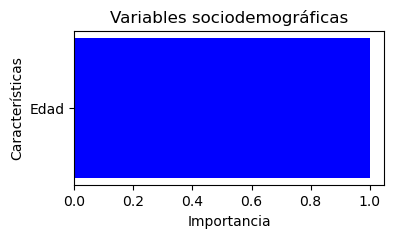


Precisión del subconjunto para Fragilidad Física: 0.6730769230769231


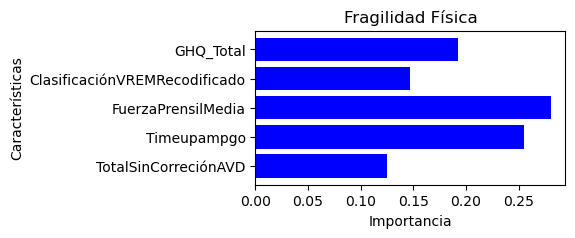


Precisión del subconjunto para Fragilidad Cognitiva: 0.7425742574257426


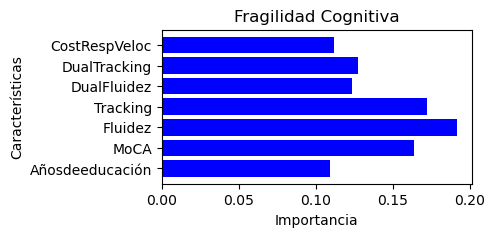


Precisión del subconjunto para Fragilidad Psicológica: 0.9811320754716981


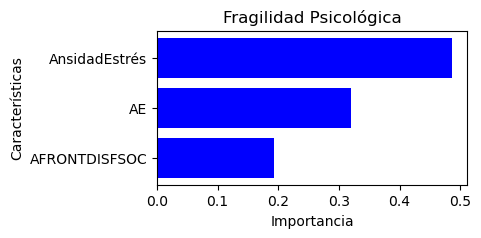


Precisión del subconjunto para Fragilidad Social: 0.9622641509433962


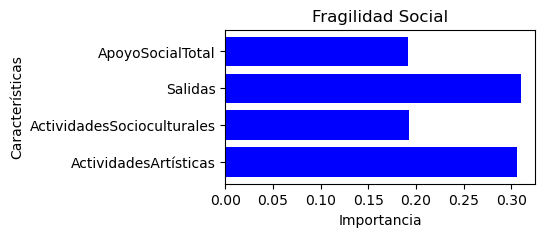

In [54]:
umbral_importancia = 0.1

lista_dataframes = [
    ("df_sociodemograficas", df_sociodemograficas, "Variables sociodemográficas"), 
    ("df_fragilidad_fisica", df_fragilidad_fisica, "Fragilidad Física"), 
    ("df_fragilidad_cognitiva", df_fragilidad_cognitiva, "Fragilidad Cognitiva"), 
    ("df_fragilidad_psicologica", df_fragilidad_psicologica, "Fragilidad Psicológica"), 
    ("df_fragilidad_social", df_fragilidad_social, "Fragilidad Social")
]

for nombre_df, dataframe, nombre_completo in lista_dataframes:
    df_cleaned = dataframe.dropna()

    cols_to_use = [col for col in df_cleaned.columns if col != 'MediaNormalizada']
    
    final_features = None
    final_accuracy = None
    final_importance_df = None

    while True:
        X = pd.get_dummies(df_cleaned[cols_to_use].drop('GradoDeterioro', axis=1), drop_first=True)
        y = df_cleaned['GradoDeterioro']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_classifier.fit(X_train, y_train)

        y_pred = rf_classifier.predict(X_test)

        feature_importance = rf_classifier.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

        significant_features = feature_importance_df[feature_importance_df['Importance'] > umbral_importancia]['Feature'].tolist()

        if len(significant_features) == len(cols_to_use) - 1 or len(significant_features) == 0:
            final_features = X[significant_features]
            final_importance_df = feature_importance_df
            break

        least_important_feature = feature_importance_df.loc[feature_importance_df['Importance'].idxmin(), 'Feature']

        cols_to_use.remove(least_important_feature)

    X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(final_features, y, test_size=0.2, random_state=42)
    rf_classifier_selected = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier_selected.fit(X_train_selected, y_train_selected)
    y_pred_selected = rf_classifier_selected.predict(X_test_selected)
    final_accuracy = accuracy_score(y_test_selected, y_pred_selected)

    print(f"Precisión del subconjunto para {nombre_completo}: {final_accuracy}")

    plt.figure(figsize=(4, 2))
    plt.barh(final_importance_df['Feature'], final_importance_df['Importance'], color='b')
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.title(f'{nombre_completo}')
    plt.show()

    print()

####### REGRESION LINEAL

Precisión del subconjunto para Variables sociodemográficas: 0.9999942468441799


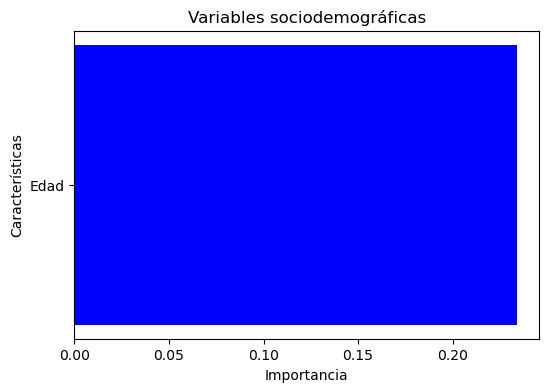


Precisión del subconjunto para Fragilidad Física: 0.9002799650010149


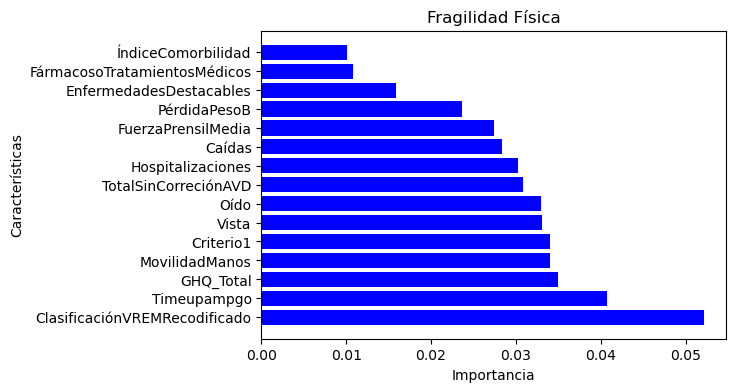


Precisión del subconjunto para Fragilidad Cognitiva: 0.9477874885285853


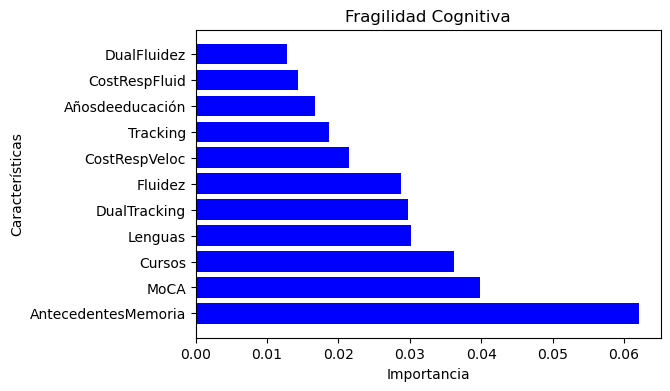


Precisión del subconjunto para Fragilidad Psicológica: 0.999994936093127


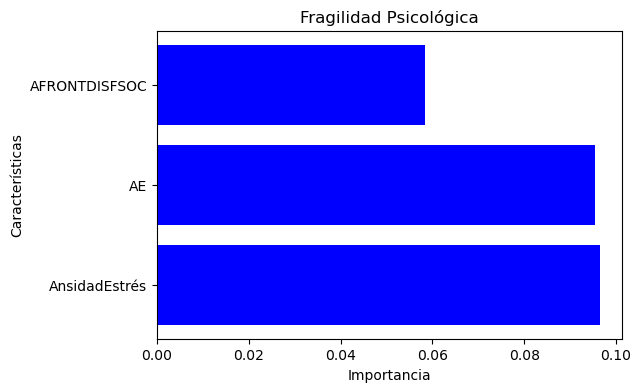


Precisión del subconjunto para Fragilidad Social: 0.9175895173652047


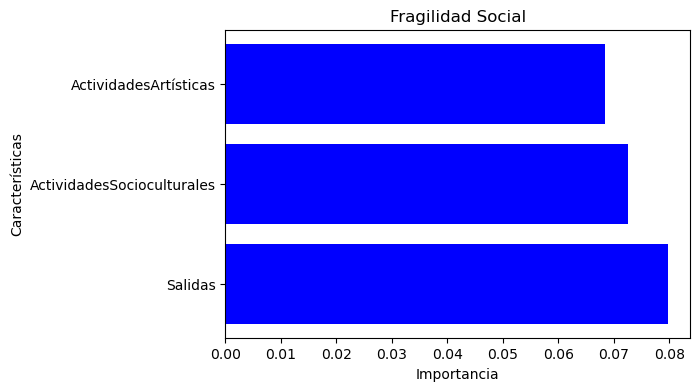

In [55]:
lista_dataframes = [
    ("df_sociodemograficas", df_sociodemograficas, "Variables sociodemográficas"), 
    ("df_fragilidad_fisica", df_fragilidad_fisica, "Fragilidad Física"), 
    ("df_fragilidad_cognitiva", df_fragilidad_cognitiva, "Fragilidad Cognitiva"), 
    ("df_fragilidad_psicologica", df_fragilidad_psicologica, "Fragilidad Psicológica"), 
    ("df_fragilidad_social", df_fragilidad_social, "Fragilidad Social")
]

for nombre_df, dataframe, nombre_completo in lista_dataframes:
    df_cleaned = dataframe.dropna()

    cols_to_use = [col for col in df_cleaned.columns if col != 'MediaNormalizada' and col != 'GradoDeterioro']

    X = pd.get_dummies(df_cleaned[cols_to_use], drop_first=False)
    y = df_cleaned['MediaNormalizada']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    best_features = None
    best_r_squared = -np.inf
    best_importance_df = None
    best_model = None
    best_scaler = None

    for i in range(1, len(cols_to_use) + 1):
        X_train_subset = X_train.iloc[:, :i]
        X_test_subset = X_test.iloc[:, :i]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_subset)
        X_test_scaled = scaler.transform(X_test_subset)

        ridge_reg = Ridge(alpha=1.0)
        ridge_reg.fit(X_train_scaled, y_train)

        r_squared = ridge_reg.score(X_test_scaled, y_test)

        if r_squared >= 0.9:
            best_features = X_train_subset.columns.tolist()
            best_r_squared = r_squared
            best_model = ridge_reg
            best_scaler = scaler

            coeficients = ridge_reg.coef_
            feature_importance_df = pd.DataFrame({'Feature': X_train_subset.columns, 'Importance': coeficients})
            feature_importance_df['Importance'] = feature_importance_df['Importance'].abs()
            feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

            feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0.01]

            best_importance_df = feature_importance_df

            break

    print(f"Precisión del subconjunto para {nombre_completo}: {best_r_squared}")
    # print(f"Conjunto de variables para {nombre_completo}:")
    
    if best_importance_df is not None:
        selected_features = best_importance_df['Feature'].tolist()
        # print(selected_features)
        
        plt.figure(figsize=(6, 4))
        plt.barh(best_importance_df['Feature'], best_importance_df['Importance'], color='b')
        plt.xlabel('Importancia')
        plt.ylabel('Características')
        plt.title(f'{nombre_completo}')
        plt.show()

    print()


##### CREAMOS GRÁFICOS PARA REPRESENTAR EL NÚMERO DE PACIENTES EN ESTADO 'Frágil', 'Prefragil' Y 'Robusto'

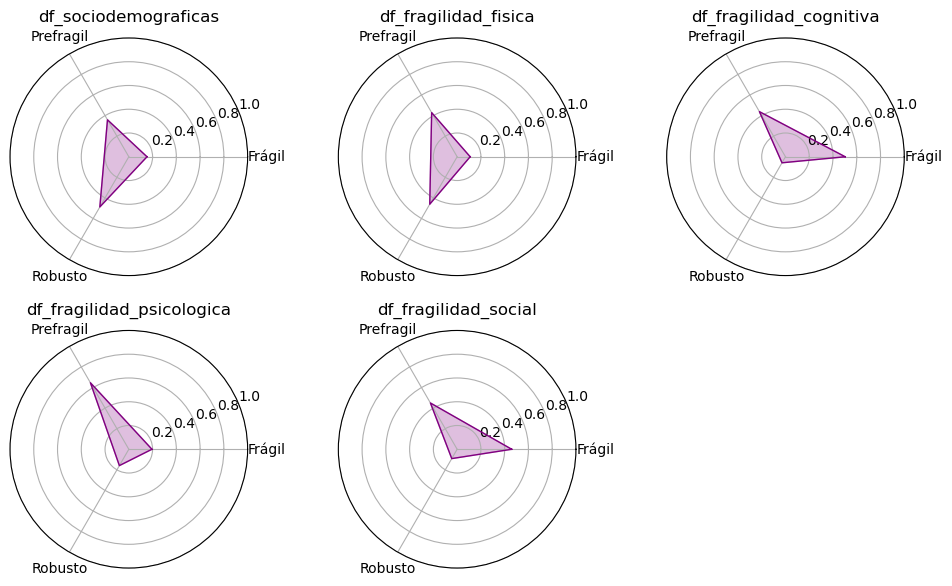

In [56]:
colors = {'Frágil': 'red', 'Prefragil': 'green', 'Robusto': 'purple'}

fig, axs = plt.subplots(2, 3, subplot_kw={'projection': 'polar'}, figsize=(10, 6))
axs = axs.flatten()

categories = ['Frágil', 'Prefragil', 'Robusto']
N = len(categories)

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

max_value = 1

for i, ax in enumerate(axs):
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, max_value)

df_list = ['df_sociodemograficas', 'df_fragilidad_fisica', 'df_fragilidad_cognitiva', 'df_fragilidad_psicologica', 'df_fragilidad_social']
for i, dataframe in enumerate(df_list):
    df_actual = globals()[dataframe]
    
    value_counts = df_actual['GradoDeterioro'].value_counts()
    values = value_counts.reindex(categories).fillna(0).values
    total = values.sum()
    normalized_values = values / total
    normalized_values = np.concatenate((normalized_values, [normalized_values[0]]))
    
    axs[i].plot(angles, normalized_values, linewidth=1, linestyle='solid', label=f'{df_list[i]}', color=colors['Robusto'])
    axs[i].fill(angles, normalized_values, alpha=0.25, color=colors['Robusto'])
    axs[i].set_title(f'{df_list[i]}')

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

####### PARA CADA TIPO DE FRAGILIDAD, REPRESENTAMOS EN UNA MISMA GRAFICA 3 PACIENTES, UNO DE CADA GRADO DE DETERIORO

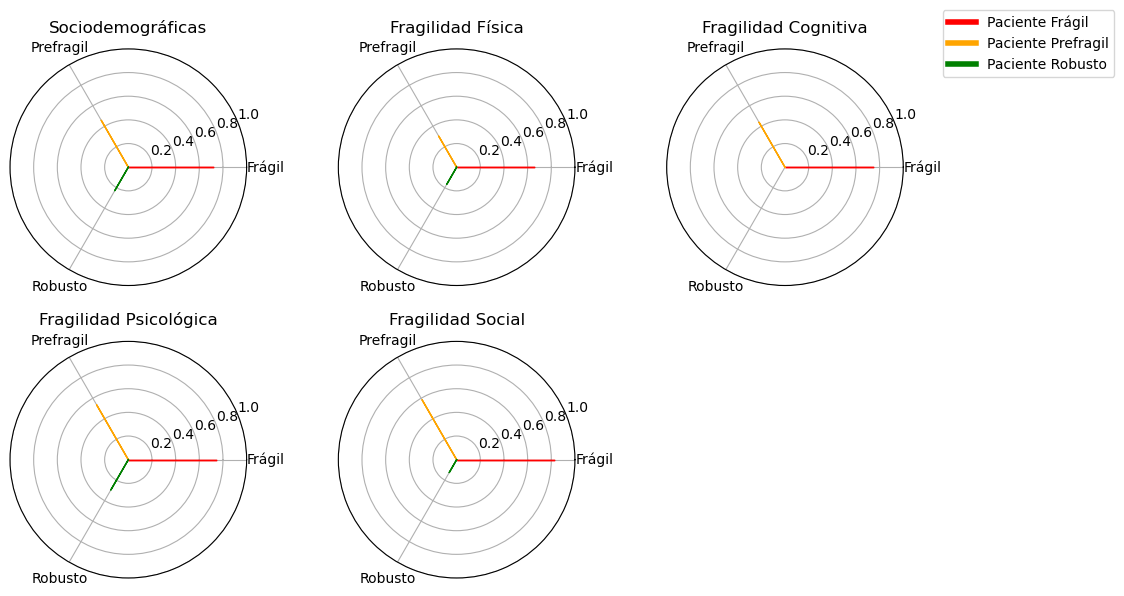

In [57]:
df_list = [df_sociodemograficas, df_fragilidad_fisica, df_fragilidad_cognitiva, df_fragilidad_psicologica, df_fragilidad_social]
df_names = ['Sociodemográficas', 'Fragilidad Física', 'Fragilidad Cognitiva', 'Fragilidad Psicológica', 'Fragilidad Social']

colors = {'Frágil': 'red', 'Prefragil': 'orange', 'Robusto': 'green'}
categories = ['Frágil', 'Prefragil', 'Robusto']

fig, axs = plt.subplots(2, 3, subplot_kw={'projection': 'polar'}, figsize=(10, 6))
axs = axs.flatten()

for idx, (dataframe, df_name) in enumerate(zip(df_list, df_names)):    
    selected_patients = []
    for category in categories:
        patients_in_category = dataframe[dataframe['GradoDeterioro'] == category]
        if not patients_in_category.empty:
            random_patient_index = np.random.randint(0, len(patients_in_category))
            selected_patient = patients_in_category.iloc[random_patient_index]
            selected_patients.append(selected_patient)
        else:
            selected_patients.append(pd.Series({'GradoDeterioro': category, 'MediaNormalizada': 0}))

    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    max_value = 1

    for patient, category in zip(selected_patients, categories):
        color = colors[category]
        values = np.zeros(len(categories))

        if 'MediaNormalizada' in patient and not patient.empty:
            patient_value = patient['MediaNormalizada']
            values[categories.index(category)] = patient_value
        
        values = np.concatenate((values, [values[0]]))

        axs[idx].plot(angles, values, linewidth=1, linestyle='solid', label=f'Paciente {category}', color=color)
        axs[idx].fill(angles, values, alpha=0.25, color=color)

    axs[idx].set_xticks(angles[:-1])
    axs[idx].set_xticklabels(categories)
    axs[idx].set_ylim(0, max_value)
    axs[idx].set_title(df_name)

legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
legend_labels = [f'Paciente {category}' for category in categories]
fig.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.15, 1))

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

####### REPRESENTAMOS EL ÁREA RELATIVA DE CADA TIPO DE FRAGILIDAD RESPECTO DE LOS 3 POSIBLES GRADOS DE DETERIORO

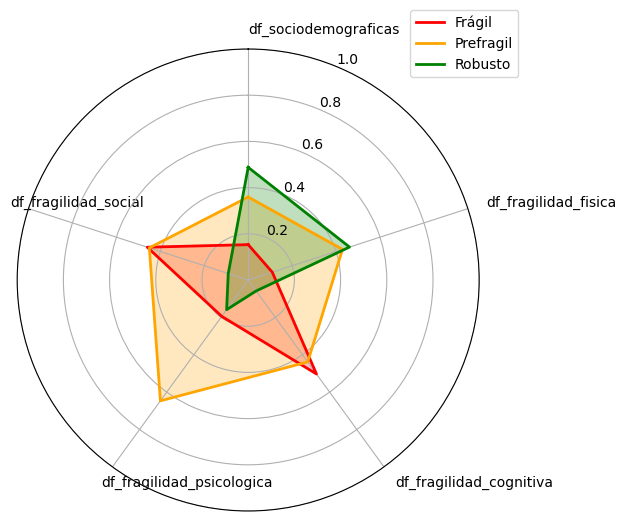

In [58]:
df_list = [df_sociodemograficas, df_fragilidad_fisica, df_fragilidad_cognitiva, df_fragilidad_psicologica, df_fragilidad_social]
df_names = ['df_sociodemograficas', 'df_fragilidad_fisica', 'df_fragilidad_cognitiva', 'df_fragilidad_psicologica', 'df_fragilidad_social']

categories = ['Frágil', 'Prefragil', 'Robusto']

colores = {
    'Frágil': 'red',
    'Prefragil': 'orange',
    'Robusto': 'green'
}

normalized_values = {category: [] for category in categories}

for dataframe in df_list:
    value_counts = dataframe['GradoDeterioro'].value_counts()
    total = value_counts.sum()
    for category in categories:
        normalized_values[category].append(value_counts.get(category, 0) / total)

angles = np.linspace(0, 2 * np.pi, len(df_names), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(df_names, fontsize=10, ha='left')

for category in categories:
    values = normalized_values[category]
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=category, color=colores[category])
    ax.fill(angles, values, color=colores[category], alpha=0.25)

ax.set_ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

####### REPRESENTAMOS LOS 3 GRADOS DE DETERIORO EN CADA UNO DE LOS TIPOS DE FRAGILIDAD

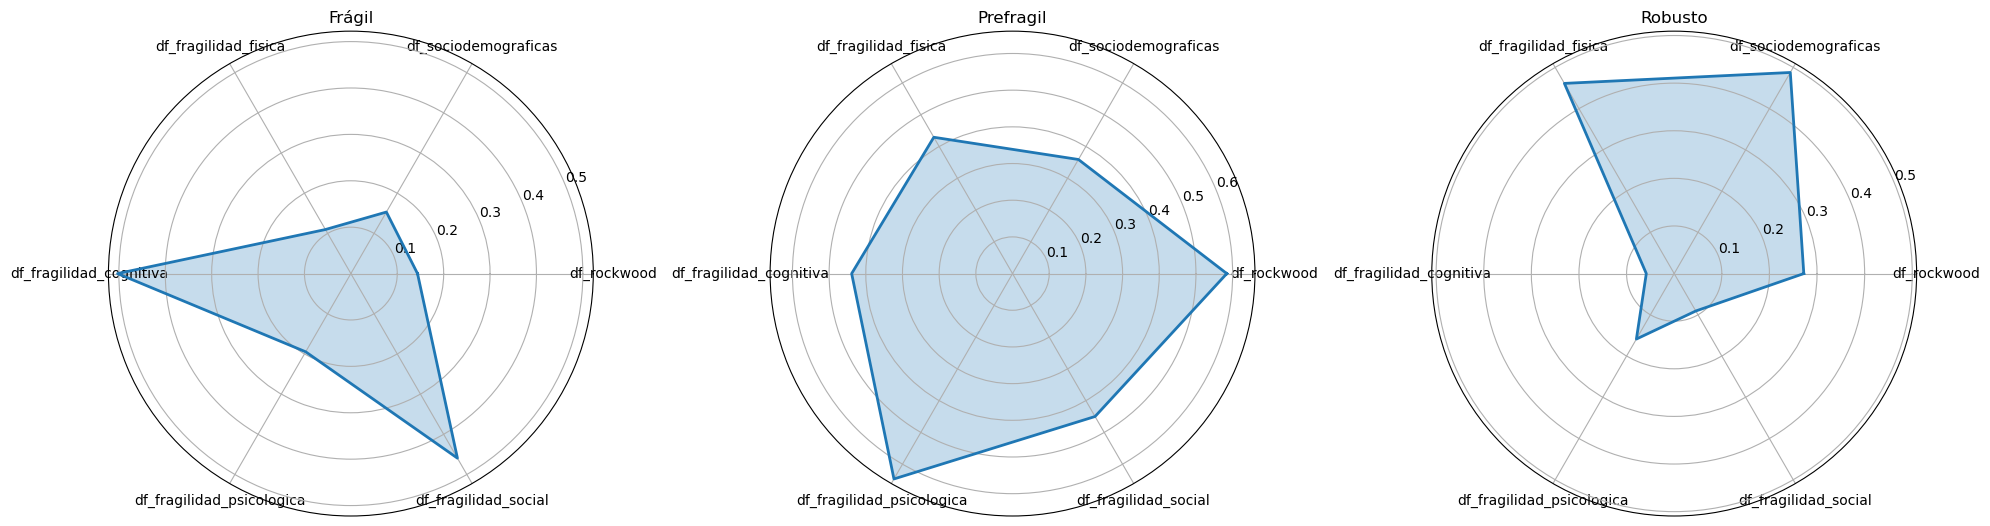

In [59]:
df_list = [df_rockwood, df_sociodemograficas, df_fragilidad_fisica, df_fragilidad_cognitiva, df_fragilidad_psicologica, df_fragilidad_social]
df_names = ['df_rockwood', 'df_sociodemograficas', 'df_fragilidad_fisica', 'df_fragilidad_cognitiva', 'df_fragilidad_psicologica', 'df_fragilidad_social']

categories = ['Frágil', 'Prefragil', 'Robusto']

normalized_values = {category: [] for category in categories}

for dataframe in df_list:
    value_counts = dataframe['GradoDeterioro'].value_counts()
    total = value_counts.sum()
    for category in categories:
        normalized_values[category].append(value_counts.get(category, 0) / total)

angles = np.linspace(0, 2 * np.pi, len(df_names), endpoint=False).tolist()
angles += angles[:1]

fig, axs = plt.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(20, 6))

for i, category in enumerate(categories):
    ax = axs[i]
    values = normalized_values[category]
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=category)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(df_names)
    ax.set_title(f'{category}')
    
plt.tight_layout()
plt.show()

##### COMPARAMOS HOMBRES Y MUJERES GLOBALMENTE SEGUN FRIED Y ROCKWOOD RESPECTIVAMENTE

In [60]:
df_dummified = pd.get_dummies(df['Sexo'], prefix='Sexo')

df = pd.concat([df, df_dummified], axis=1)

df.drop(columns=['Sexo', 'Sexo_3.0'], inplace=True)

In [61]:
def contar_pacientes_por_estado(df, estado_col, sexo_hombres_col, sexo_mujeres_col):
    hombres = df[df[sexo_hombres_col] == 1]
    mujeres = df[df[sexo_mujeres_col] == 1]
    
    hombres_contar = hombres[estado_col].value_counts().to_dict()
    
    mujeres_contar = mujeres[estado_col].value_counts().to_dict()
    
    return hombres_contar, mujeres_contar

hombres_df, mujeres_df = contar_pacientes_por_estado(df, 'DiagnósticoFragilidadFísica', 'Sexo_Hombres', 'Sexo_Mujeres')
hombres_rockwood, mujeres_rockwood = contar_pacientes_por_estado(df_rockwood, 'GradoDeterioro', 'Sexo_Hombres', 'Sexo_Mujeres')

print("Hombres fried:", hombres_df)
print("Mujeres fried:", mujeres_df)
print("Hombres rockwood:", hombres_rockwood)
print("Mujeres rockwood:", mujeres_rockwood)


Hombres fried: {'Prefragil': 93, 'Robusto': 73, 'Frágil': 33, 'Faltan datos': 0}
Mujeres fried: {'Prefragil': 175, 'Robusto': 93, 'Frágil': 62, 'Faltan datos': 0}
Hombres rockwood: {'Prefragil': 113, 'Robusto': 66, 'Frágil': 20}
Mujeres rockwood: {'Prefragil': 196, 'Robusto': 78, 'Frágil': 56}


##### DETERMINAMOS LA PREVALENCIA DE CADA TIPO DE FRAGILIDAD PARA LA MUESTRA (CIUDAD), ENTRE HOMBRES/MUJERES Y POR GRUPOS DE EDAD (65-75 AÑOS, 75-85 AÑOS, +85)

In [62]:
indices_portugal = df_sociodemograficas[df_sociodemograficas['Lugar_Portugal'] == 1].index.tolist()
indices_santiago = df_sociodemograficas[df_sociodemograficas['Lugar_Santiago'] == 1].index.tolist()
indices_valencia = df_sociodemograficas[df_sociodemograficas['Lugar_Valencia'] == 1].index.tolist()

####### FILTRAMOS LOS DATAFRAME EN FUNCIÓN DE LA CIUDAD (Valencia, Santiago, Portugal)

In [63]:
dataframes = [
    ('Sociodemográficas', df_sociodemograficas),
    ('Fragilidad Física', df_fragilidad_fisica),
    ('Fragilidad Cognitiva', df_fragilidad_cognitiva),
    ('Fragilidad Psicológica', df_fragilidad_psicologica),
    ('Fragilidad Social', df_fragilidad_social)
]

def filtrar_por_indices(dataframe, indices):
    return dataframe.loc[indices]

df_filtrados = {
    'Portugal': {},
    'Santiago': {},
    'Valencia': {}
}

for name, dataframe in dataframes:
    df_filtrados['Portugal'][name] = filtrar_por_indices(dataframe, indices_portugal)
    df_filtrados['Santiago'][name] = filtrar_por_indices(dataframe, indices_santiago)
    df_filtrados['Valencia'][name] = filtrar_por_indices(dataframe, indices_valencia)

# for lugar, dfs in df_filtrados.items():
#     print(f"\nDataFrames para {lugar}:")
#     for name, dataframe in dfs.items():
#         print(f"\n{name}:\n{dataframe}")

####### FILTRAMOS LOS DATAFRAME EN FUNCIÓN DE LA CIUDAD (Valencia, Santiago, Portugal) Y SEXO (Hombres, Mujeres)

In [64]:
indices_sexo_por_lugar = {
    'Portugal': {'hombres': None, 'mujeres': None},
    'Santiago': {'hombres': None, 'mujeres': None},
    'Valencia': {'hombres': None, 'mujeres': None}
}

for lugar, dfs_por_lugar in df_filtrados.items():
    df_sociodemograficas_lugar = dfs_por_lugar['Sociodemográficas']
    
    indices_hombres = df_sociodemograficas_lugar[df_sociodemograficas_lugar['Sexo_Hombres'] == 1].index
    indices_mujeres = df_sociodemograficas_lugar[df_sociodemograficas_lugar['Sexo_Mujeres'] == 1].index
    
    indices_sexo_por_lugar[lugar]['hombres'] = indices_hombres
    indices_sexo_por_lugar[lugar]['mujeres'] = indices_mujeres

# for lugar, indices_por_sexo in indices_sexo_por_lugar.items():
#     print(f"Lugar: {lugar}")
#     print("Índices de hombres:", indices_por_sexo['hombres'])
#     print("Índices de mujeres:", indices_por_sexo['mujeres'])
#     print()


In [65]:
df_divididos_por_sexo_y_fragilidad = {}

for lugar, indices_por_sexo in indices_sexo_por_lugar.items():
    df_divididos_por_sexo_y_fragilidad[lugar] = {'hombres': {}, 'mujeres': {}}
    
    for fragilidad, df_fragilidad in df_filtrados[lugar].items():
        hombres_df = df_fragilidad.loc[indices_por_sexo['hombres']]
        mujeres_df = df_fragilidad.loc[indices_por_sexo['mujeres']]
        
        df_divididos_por_sexo_y_fragilidad[lugar]['hombres'][fragilidad] = hombres_df
        df_divididos_por_sexo_y_fragilidad[lugar]['mujeres'][fragilidad] = mujeres_df

# for lugar, dfs_por_sexo in df_divididos_por_sexo_y_fragilidad.items():
#     print(f"Lugar: {lugar}")
#     for sexo, dfs_por_fragilidad in dfs_por_sexo.items():
#         print(f"Sexo: {sexo}")
#         for fragilidad, df_fragilidad in dfs_por_fragilidad.items():
#             print(f"Tipo de fragilidad: {fragilidad}")
#             print(f"Cantidad de filas: {(df_fragilidad)}")
#             print()
#         print()


####### FILTRAMOS LOS DATAFRAME EN FUNCIÓN DE LA CIUDAD (Valencia, Santiago, Portugal), POR SEXO (Hombres, Mujeres) Y POR EDAD (65-75 años, 75-85 años, + de 85 años)

In [66]:
rangos_edad = [(65, 75), (75, 85), (85, float('inf'))]

indices_grupo_1 = []
indices_grupo_2 = []
indices_grupo_3 = []

for indice, edad in df['Edad'].items():
    if 65 <= edad < 75:
        indices_grupo_1.append(indice)
    elif 75 <= edad < 85:
        indices_grupo_2.append(indice)
    else:
        indices_grupo_3.append(indice)


In [67]:
rangos_edad = [(65, 75), (75, 85), (85, float('inf'))]

df_divididos_por_sexo_fragilidad_y_edad = {}

for lugar, dfs_por_sexo in df_divididos_por_sexo_y_fragilidad.items():
    df_divididos_por_sexo_fragilidad_y_edad[lugar] = {'hombres': {}, 'mujeres': {}}
    
    for sexo, dfs_por_fragilidad in dfs_por_sexo.items():
        df_divididos_por_sexo_fragilidad_y_edad[lugar][sexo] = {}
        
        for fragilidad, df_fragilidad in dfs_por_fragilidad.items():
            df_divididos_por_sexo_fragilidad_y_edad[lugar][sexo][fragilidad] = {}
            
            for rango in rangos_edad:
                edad_inferior, edad_superior = rango
                df_por_edad = df_fragilidad[
                    (df['Edad'] >= edad_inferior) &
                    (df['Edad'] < edad_superior)
                ]
                df_divididos_por_sexo_fragilidad_y_edad[lugar][sexo][fragilidad][rango] = df_por_edad

# for lugar, dfs_por_sexo in df_divididos_por_sexo_fragilidad_y_edad.items():
#     print(f"Lugar: {lugar}")
#     for sexo, dfs_por_fragilidad in dfs_por_sexo.items():
#         print(f"Sexo: {sexo}")
#         for fragilidad, dfs_por_edad in dfs_por_fragilidad.items():
#             print(f"Tipo de fragilidad: {fragilidad}")
#             for rango, df_por_edad in dfs_por_edad.items():
#                 print(f"Grupo de edad: {rango}")
#                 print(f"Cantidad de filas: {len(df_por_edad)}")
#                 print()
#             print()
#         print()


In [68]:
# for lugar, dfs_por_sexo in df_divididos_por_sexo_fragilidad_y_edad.items():
#     print(f"Lugar: {lugar}")
#     for sexo, dfs_por_fragilidad in dfs_por_sexo.items():
#         print(f"Sexo: {sexo}")
#         for fragilidad, dfs_por_edad in dfs_por_fragilidad.items():
#             print(f"Tipo de fragilidad: {fragilidad}")
#             for rango, df_por_edad in dfs_por_edad.items():
#                 print(f"Grupo de edad: {rango}")
#                 print(f"Cantidad de filas: {len(df_por_edad)}")
#                 print("Dataframe:")
#                 print(df_por_edad)
#                 print()
#             print()
#         print()
#     print()


In [69]:
# for lugar, dfs_por_sexo in df_divididos_por_sexo_fragilidad_y_edad.items():
#     print(f"Lugar: {lugar}")
#     for sexo, dfs_por_fragilidad in dfs_por_sexo.items():
#         print(f"Sexo: {sexo}")
#         for fragilidad, dfs_por_edad in dfs_por_fragilidad.items():
#             print(f"Tipo de fragilidad: {fragilidad}")
#             for rango, df_por_edad in dfs_por_edad.items():
#                 print(f"Grupo de edad: {rango}")
#                 print(f"Cantidad de filas: {len(df_por_edad)}")
#                 conteo_grado_deterioro = df_por_edad['GradoDeterioro'].value_counts()
#                 print("Conteo de Grado de Deterioro:")
#                 print(conteo_grado_deterioro)
                
#                 print()
#             print()
#         print()
#     print()

##### NORMALIZAMOS LOS DATOS DE FRIED Y APLICAMOS EL MISMO CRITERIO QUE CON ROCKWOOD PARA VER SI LOS RESULTADOS SALEN IGUALES

In [70]:
df_criterios['Puntuacion'] = df_criterios.eq(1).sum(axis=1)

df_criterios['MediaNormalizada'] = df_criterios['Puntuacion'] / 5

grado_deterioro = df_criterios[['Puntuacion', 'MediaNormalizada']].copy()

grado_deterioro['pesos_fried_normalizado'] = grado_deterioro['MediaNormalizada'].apply(medianormalizada)

print(grado_deterioro)

     Puntuacion  MediaNormalizada pesos_fried_normalizado
0             1               0.2                 Robusto
1             0               0.0                 Robusto
2             1               0.2                 Robusto
3             1               0.2                 Robusto
4             1               0.2                 Robusto
..          ...               ...                     ...
609           0               0.0                 Robusto
610           2               0.4               Prefragil
611           1               0.2                 Robusto
612           1               0.2                 Robusto
613           1               0.2                 Robusto

[529 rows x 3 columns]


In [71]:
orden_valores = ['Robusto', 'Prefragil', 'Frágil']

for valor in orden_valores:
    frecuencia = (grado_deterioro['pesos_fried_normalizado'] == valor).sum()
    print(f"Valor: {valor}: {frecuencia}")

Valor: Robusto: 340
Valor: Prefragil: 94
Valor: Frágil: 95


####### CALCULAMOS LA MATRIZ CONFUSIÓN ENTRE LAS MEDIAS NORMALIZADAS DE FRIED Y ROCKWOOD

In [72]:
correlation = grado_deterioro['MediaNormalizada'].corr(df_rockwood['MediaNormalizada'])
correlation

0.8345864560571307

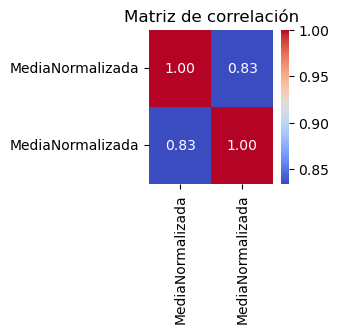

In [73]:
df_correlacion = pd.concat([grado_deterioro['MediaNormalizada'], df_rockwood['MediaNormalizada']], axis=1)

matriz_corr2 = df_correlacion.corr()

# Representamos un heatmap de correlación entre cada par de variables
plt.figure(figsize=(2, 2))
sns.heatmap(matriz_corr2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [74]:
grado_deterioro['pesos_fried_normalizado'].value_counts()

Robusto      340
Frágil        95
Prefragil     94
Name: pesos_fried_normalizado, dtype: int64

In [75]:
df_rockwood['GradoDeterioro'].value_counts()

Prefragil    309
Robusto      144
Frágil        76
Name: GradoDeterioro, dtype: int64

####### PROBAMOS EL MISMO PROCESO PERO CON OTRO PUNTOS DE CORTE

In [76]:
puntos_discretizacion_rockwood = [0, 0.3, 0.6]

def discretizar_rockwood(medianormalizada):
    if puntos_discretizacion_rockwood[0] <= medianormalizada < puntos_discretizacion_rockwood[1]:
        return 'Robusto'
    elif puntos_discretizacion_rockwood[1] <= medianormalizada < puntos_discretizacion_rockwood[2]:
        return 'Prefragil'
    else:
        return 'Frágil'

predicciones_rockwood = [discretizar_rockwood(valor) for valor in df_rockwood['MediaNormalizada']]

conteo_robusto = predicciones_rockwood.count('Robusto')
conteo_prefragil = predicciones_rockwood.count('Prefragil')
conteo_fragil = predicciones_rockwood.count('Frágil')

print("Método de Rockwood:")
print(f"Robusto: {conteo_robusto}")
print(f"Prefragil: {conteo_prefragil}")
print(f"Frágil: {conteo_fragil}")


df_resultados = pd.DataFrame({
    'MediaNormalizada': df_rockwood['MediaNormalizada'],
    'Prediccion_Rockwood': predicciones_rockwood
})


Método de Rockwood:
Robusto: 144
Prefragil: 309
Frágil: 76


In [77]:
df_resultados['DiagnósticoFragilidadFísica'] = df['DiagnósticoFragilidadFísica']

coincidencias = (df_resultados['Prediccion_Rockwood'] == df_resultados['DiagnósticoFragilidadFísica']).sum()

print("Coincidencias entre Rockwood y diagnóstico de fragilidad física:")
print(f"{coincidencias} casos")

coincidencias_fragil = ((df_resultados['Prediccion_Rockwood'] == 'Frágil') & (df_resultados['DiagnósticoFragilidadFísica'] == 'Frágil')).sum()
coincidencias_prefragil = ((df_resultados['Prediccion_Rockwood'] == 'Prefragil') & (df_resultados['DiagnósticoFragilidadFísica'] == 'Prefragil')).sum()
coincidencias_robusto = ((df_resultados['Prediccion_Rockwood'] == 'Robusto') & (df_resultados['DiagnósticoFragilidadFísica'] == 'Robusto')).sum()

print("Coincidencias entre Rockwood y diagnóstico de fragilidad física:")

print(f"Frágil: {coincidencias_fragil} casos")
print(f"Prefragil: {coincidencias_prefragil} casos")
print(f"Robusto: {coincidencias_robusto} casos")


Coincidencias entre Rockwood y diagnóstico de fragilidad física:
382 casos
Coincidencias entre Rockwood y diagnóstico de fragilidad física:
Frágil: 68 casos
Prefragil: 215 casos
Robusto: 99 casos


In [78]:
# Matriz de confusion
pd.crosstab(df_resultados['Prediccion_Rockwood'], df_resultados['DiagnósticoFragilidadFísica'])

DiagnósticoFragilidadFísica  Frágil  Prefragil  Robusto
Prediccion_Rockwood                                    
Frágil                           68          8        0
Prefragil                        27        215       67
Robusto                           0         45       99

####### SELECCIÓN ÓPTIMA DE LOS PUNTOS DE CORTE

In [79]:
range_values = np.arange(0, 1, 0.1)

def discretizar_rockwood(medianormalizada, puntos):
    if puntos[0] <= medianormalizada < puntos[1]:
        return 'Robusto'
    elif puntos[1] <= medianormalizada < puntos[2]:
        return 'Prefragil'
    else:
        return 'Frágil'

mejores_puntos = None
mejor_suma_diagonal = -1

for p1 in range_values:
    for p2 in range_values:
        if p1 < p2:
            puntos_discretizacion_rockwood = [0, p1, p2]

            predicciones_rockwood = [discretizar_rockwood(valor, puntos_discretizacion_rockwood) for valor in df_rockwood['MediaNormalizada']]

            matriz_confusion = pd.crosstab(predicciones_rockwood, df['DiagnósticoFragilidadFísica'])

            suma_diagonal = np.trace(matriz_confusion.values)

            if suma_diagonal > mejor_suma_diagonal:
                mejor_suma_diagonal = suma_diagonal
                mejores_puntos = puntos_discretizacion_rockwood

print("Mejores puntos de corte:", mejores_puntos)
print("Mejor suma de la diagonal de la matriz de confusión:", mejor_suma_diagonal)

Mejores puntos de corte: [0, 0.30000000000000004, 0.6000000000000001]
Mejor suma de la diagonal de la matriz de confusión: 382
